# Project Title

## Relationships between H1B Visa, Living Wage and Income

# Team Members

| Name | unique name |
|---|---|
|Yen-wen Chin | yenwench |
|Yan-Ni Tai | yannitai |
|Seung Seok Lee|seogie|

# Overview

**Main goal:**  

To explore the relationships between H1B visa distributions, living wage standards, and income levels in the United States, with the goal of understanding the impact of the US jobs market for international students and the economy .

**Methodology:** 
1. Data Collection: Data we used in the project is US Minimum Wage by State from 1968 to 2020, Living Wage - 50 States, and US Minimum Wage by State. All data is collected from kaggle with a csv file.
2. Data Manipulation: Deleted the irrelevant columns and rows, and transformed the wage column scope from hourly to yearly for analysis.
3. Data Visualization: Create plots to understand each data set, and the relationship between the three data set.

**Expected Results:**
1. The number of H1B visas issued each state has a positive relationship with the living wage by each state.
2. The number of H1B visas issued will increase as the features in economic metrics(minimum wage, CPI, etc.) increase.
3. States with higher minimum wages will also have higher living wages.


# Motivation

As international students, we studied abroad with aspirations of building careers in the United States, and the H1B visa serves as a crucial link to the job market. Through this project, we seek to dive into how H1B visa distributions, along with minimum and living wage data, influence each other, which is relevant to our academic and professional interests. 

1. Will the number of H1B increase, and Living/minimum wage also increase? 
2. Given the increase in the U.S. minimum wage in 2020, can we also see a corresponding rise in the living wage?
3. Is the living wage or the minimum wage a better predictor of H1B visa allocations?

# Data Sources

Kaggle: [H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022](https://www.kaggle.com/datasets/jishnukoliyadan/lca-programs-h1b-h1b1-e3-visa-petitions?resource=download)

Kaggle: [Living Wage - 50 States](https://www.kaggle.com/datasets/brandonconrady/living-wage-50-states)

Kaggle: [US Minimum Wage by State from 1968 to 2020](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)

# Data Description

### H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022
The dataset contains the Visa Petitions data from 2017 to 2022 and the columns we use as following:

|Column | Description |
|---|---|
|*Visa_Class*|Indicates the type of temporary application submitted for processing. Values include H-1B, E-3 Australian, H-1B 1 Chile, and H-1B1 Singapore.|
|*EMPLOYER_NAME*|Legal business name of the employer submitting the Labor Condition Application.|
|*SOC_Title*|Occupational title associated with the SOC/O*NET Code.|
|*Job_Title*|Title of the job.|
|*Full_Time_Position*|Y = Full Time Position; N = Part Time Position.|
|*Worksite*|Geographic Information for First Worksite Location.|
|*Prevailing_Wage*|Prevailing Wage for the job being requested for First Worksite Location.|
|*Unit_Of_Pay*|Unit of Prevailing Wage Pay for First Worksite Location.|
|*Employer_Location*|Contact information for the Employer Point of Contact submitting a Labor Condition Application.|
|*Employer_Country*|Contact information for the Employer Point of Contact submitting a Labor Condition Application.|

### Living Wage - 50 States
The dataset contains Living Wage for 50 States and the columns we use as following:

For the living wage columns, they are in US Dollars per hour, assuming each adult specified works 2080 hours per year, or 52 weeks with 40 hours each week.

|Column | Description |
|---|---|
|*population_2020*|Indicates the population in 2020 census.|
|*land_area_sqmi*|Land area in square miles.|
|*population_density*|People per square mile.|
|*oneadult_nokids*|Living wage for one adult with no kids.|
|*oneadult_onekid*|Living wage for one adult with one kid.|
|*oneadult_twokids*|Living wage for one adult with two kids.|
|*oneadult_threekids*|Living wage for one adult with three kids.|
|*twoadults_oneworking_nokids*|Living wage for two adults, one working, with no kids.|
|*twoadults_oneworking_onekid*|Living wage for two adults, one working, with one kid.|
|*twoadults_oneworking_twokids*|Living wage for two adults, one working, with two kids.|
|*twoadults_oneworking_threekids*|Living wage for two adults, one working, with three kids.|
|*twoadults_bothworking_nokids*|Living wage for two adults, both working, with no kids.|
|*twoadults_bothworking_onekid*|Living wage for two adults, both working, with one kid.|
|*twoadults_bothworking_twokids*|Living wage for two adults, both working, with two kids.|
|*twoadults_bothworking_threekids*|Living wage for two adults, both working, with three kids.|

### US Minimum Wage by State from 1968 to 2020
The dataset is the minimum wage in the United States by the federal government and each state from 1968 to 2020.

|Column | Description |
|---|---|
|*Year*| The year of the data|
|*States*|The state of the data|
|*State.Minimum.Wage*| The state’s minimum wage of Jan 1st|
|*State.Minimum.Wage.2020.Dollars*| The state's minimum wage in 2020 dollar value|
|*Federal.Minimum.Wage*| The federal minimum wage as of January 1 of the given year|
|*Federal.Minimum.Wage.2020.Dollars*| The federal minimum wage in 2020 dollar value, adjusted for inflation|
|*Effective.Minimum.Wage*| The effective minimum wage in the state on January 1 of the given year, which is the higher of the state or federal minimum wage|
|*Effective.Minimum.Wage.2020.Dollars*| The effective minimum wage in 2020 dollar value, which is the higher of the state or federal minimum wage|
|*CPI.Average*| The average value of the Consumer Price Index in Year|
|*Department.Of.Labor.Uncleaned.Data*| The raw scraped minimum wage data from the Department of Labor's website|
|*Department.Of.Labor.Cleaned.Low.Value*| The lowest enforced minimum wage in the state on January 1 of the given year|
|*Department.Of.Labor.Cleaned.Low.Value.2020.Dollars*| The lowest enforced minimum wage in 2020 dollar value|
|*Department.Of.Labor.Cleaned.High.Value*| The highest enforced minimum wage in the state on January 1 of the given year|
|*Department.Of.Labor.Cleaned.High.Value.2020.Dollars*|  The highest enforced minimum wage in 2020 dollar value|
|*Footnote*| Any footnotes provided on the Department of Labor's website|



---

# Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022
### Read the data and add the year column.

In [2]:
# Create a data frame to store the H1B data
H1B_Dataset = pd.DataFrame()

# Use for loop through the years 2017 to 2020
for year in range(2017, 2021):

    file_name = f'./data/original_data/LCA_FY_{year}.csv'

    # Read the data from the csv file
    df = pd.read_csv(file_name)

    # Add year column to the data frame
    df['Year'] = year

    # Concatenate the data frame to the H1B_Dataset
    H1B_Dataset = pd.concat([H1B_Dataset, df], ignore_index=True)

/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/1530490996.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [3]:
H1B_Dataset.Year.unique()

array([2017, 2018, 2019, 2020])

### Drop the unwanted columns to reduce the size of the data frame

First, we create a missing value graph to visualize the missing values.

<Axes: >

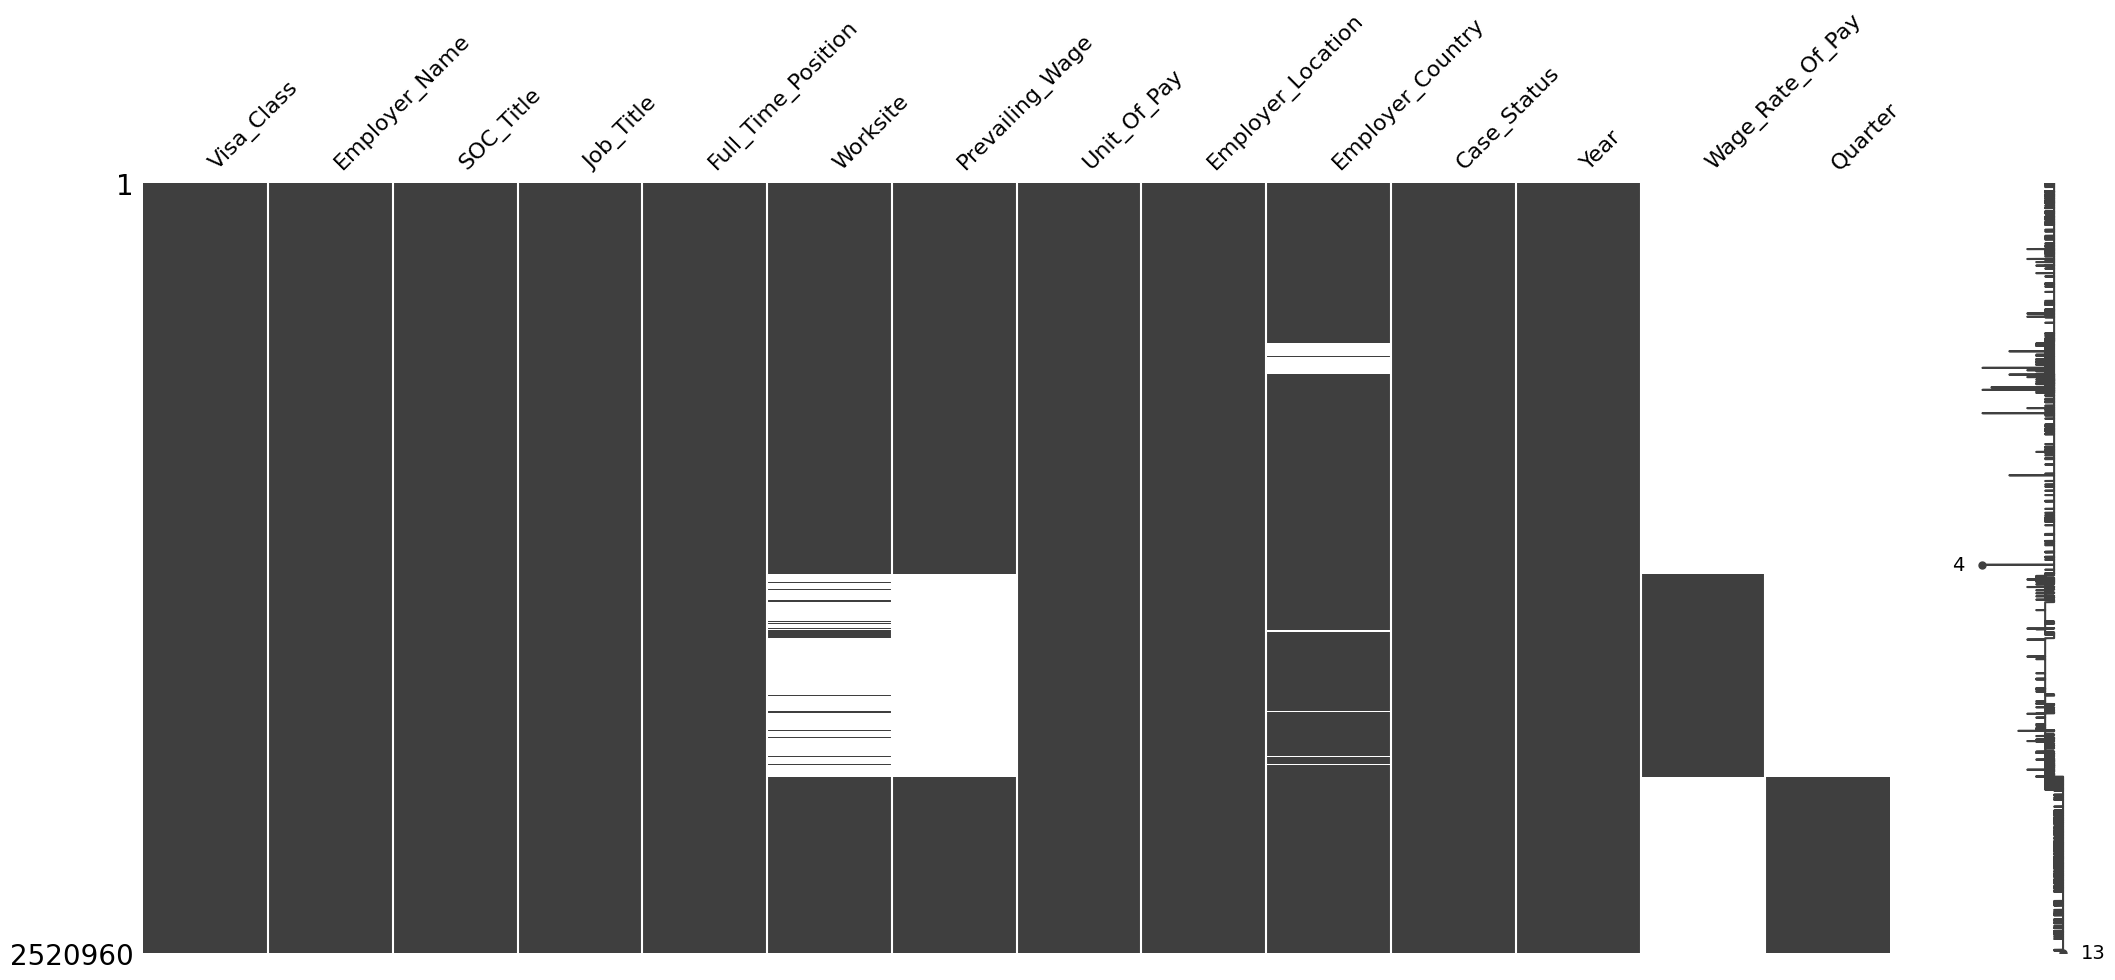

In [4]:
msno.matrix(H1B_Dataset)

According to the missing values graph, most of the missing values are related to column "Quarter" and we drop those columns.

In [5]:
H1B_Dataset.drop(['Quarter'], axis=1, inplace=True)
H1B_Dataset

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Year,Wage_Rate_Of_Pay
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.00,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.00,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.00,Year,"Washington, District of Columbia",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.00,Year,"Livonia, Michigan",United States Of America,WITHDRAWN,2017,NaN
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.00,Year,"Wilson, North Carolina",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520955,E-3 Australian,Flat Tech Inc.,Chief Executives,Chief Financial Officer,Y,"San Diego, California",274310.00,Year,"Schaumburg, Illinois",United States Of America,Withdrawn,2020,NaN
2520956,E-3 Australian,We Work Management LLC,Sales Managers,Account Director,Y,"New York, New York",110594.00,Year,"New York, New York",United States Of America,Withdrawn,2020,NaN
2520957,E-3 Australian,Agassiz Baldwin Community,Teacher Assistants,OST Teacher,N,"Cambridge, Massachusetts",19.73,Hour,"Cambridge, Massachusetts",United States Of America,Withdrawn,2020,NaN
2520958,E-3 Australian,Houzz Inc.,Lawyers,Houzz Inc.,Y,"Santa Monica, California",131310.00,Year,"Palo Alto, California",United States Of America,Withdrawn,2020,NaN


According to the kaggle website, we know that the Wage_Rate_Of_Pay values are same as the Prevailing_Wage, thus if Prevailing_Wage is empty we copy the value in Wage_Rate_Of_Pay column. After this, we drop the Wage_Rate_Of_Pay column.

In [6]:
H1B_Dataset['Prevailing_Wage'] = H1B_Dataset['Prevailing_Wage'].fillna(H1B_Dataset['Wage_Rate_Of_Pay'])

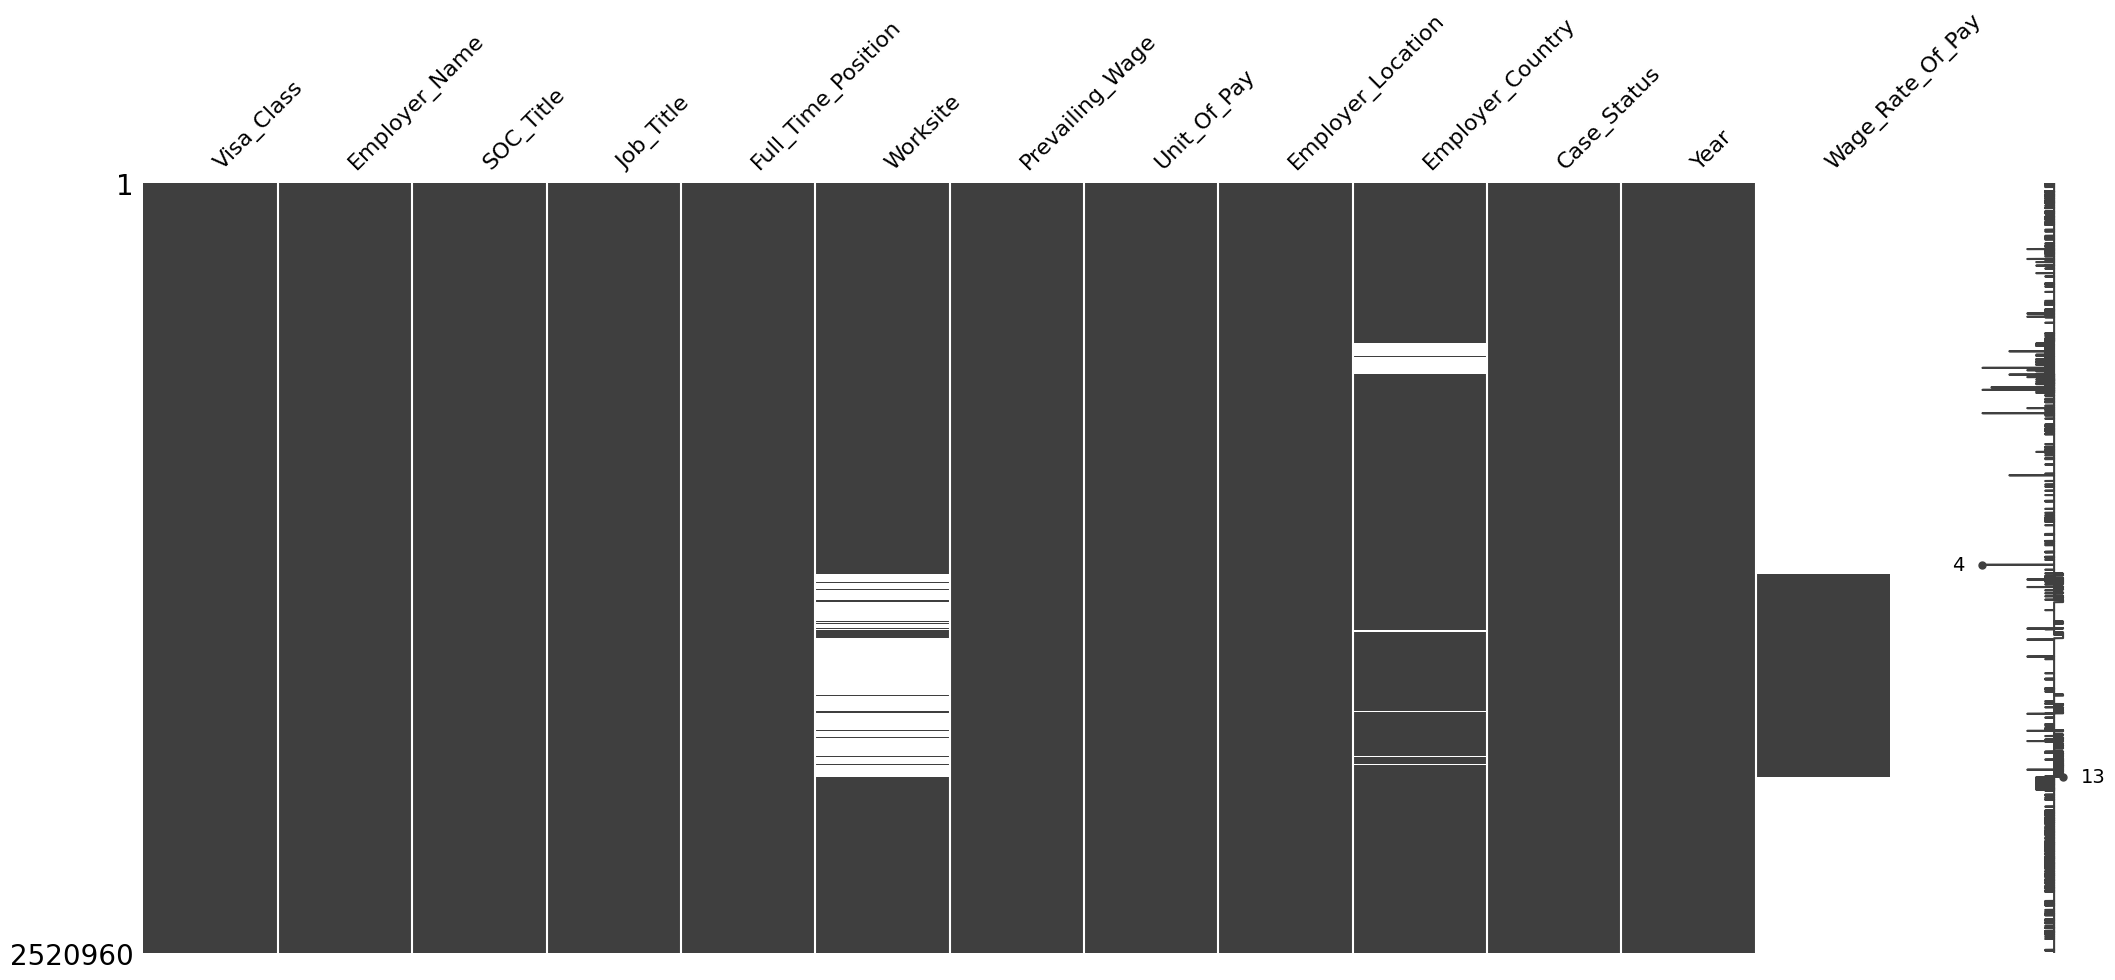

In [7]:
msno.matrix(H1B_Dataset)
H1B_Dataset.drop(['Wage_Rate_Of_Pay'], axis=1, inplace=True)

Based on the provided plot, it's evident that a significant portion of the data experienced a loss of worksite values in 2019.

In [8]:
H1B_Dataset[H1B_Dataset.Worksite.isna()].Year.value_counts()

Year
2019    580971
2020        36
2018        27
2017        21
Name: count, dtype: int64

### Select the rows that visa status is 'H1B'
Because we only analysed the data in the USA, we dropped the data outside the country.

In [9]:
tmp = H1B_Dataset[H1B_Dataset['Visa_Class'] == 'H-1B']
tmp.Visa_Class.value_counts()


Visa_Class
H-1B    2463157
Name: count, dtype: int64

### Choose that employers are located in the United States

In [10]:
tmp = tmp[tmp.Employer_Country == 'United States Of America']
tmp.Employer_Country.value_counts()

# After making sure that the Employer_Country is only United States of America, we can drop the column
tmp.drop(['Employer_Country'], axis=1, inplace=True)

### Split the locations column into City and State.

In the provided information, the format specified for the "Worksite" column is "City, County, State."

However, we have selectively extracted only the "City" and "State" values for our analysis.

In [11]:
# The data in the Worksite format
comma_counts = tmp['Worksite'].str.count(',')
row_with_2_comma = tmp.Worksite[comma_counts == 2]
row_with_2_comma.unique()

array(['Tucson,, Arizona', 'Reston,, Virginia',
       'Pawtucket,, Rhode Island', ..., 'Middleburg Heights,, Ohio',
       'Middleburg Heights, Cuyahoga, Ohio', 'Eagan, Mn 55121, Minnesota'],
      dtype=object)

In [12]:
# Now we have extracted only the "City" and "State" values from the Worksite column
tmp['Worksite_city'] = tmp['Worksite'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
tmp['Worksite_state'] = tmp['Worksite'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)

# Now we have extracted only the "City" and "State" values from the Employer_Location column
tmp['Employer_city'] = tmp['Employer_Location'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
tmp['Employer_state'] = tmp['Employer_Location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)


In [13]:
Workstate_num = tmp['Worksite_state'].nunique()
Workstate_num

Employerstate_num = tmp['Employer_state'].nunique()
Employerstate_num

55

Apart from the 50 states, there are 5 special values which are District of Columbia, Guam, Puerto Rico, Northern Mariana Islands, and U.S. Virgin Islands. We keep these values in case we will need these data.

In [14]:
H1B_USA = tmp
H1B_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2342541 entries, 0 to 2520897
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Visa_Class          object 
 1   Employer_Name       object 
 2   SOC_Title           object 
 3   Job_Title           object 
 4   Full_Time_Position  object 
 5   Worksite            object 
 6   Prevailing_Wage     float64
 7   Unit_Of_Pay         object 
 8   Employer_Location   object 
 9   Case_Status         object 
 10  Year                int64  
 11  Worksite_city       object 
 12  Worksite_state      object 
 13  Employer_city       object 
 14  Employer_state      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 286.0+ MB


### Data overview and save to new csv file

In [15]:
H1B_USA.head(10)

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,Year,Worksite_city,Worksite_state,Employer_city,Employer_state
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.0,Year,"Riverwoods, Illinois",CERTIFIED-WITHDRAWN,2017,Riverwoods,Illinois,Riverwoods,Illinois
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.0,Year,"Riverwoods, Illinois",CERTIFIED-WITHDRAWN,2017,Riverwoods,Illinois,Riverwoods,Illinois
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.0,Year,"Washington, District of Columbia",CERTIFIED-WITHDRAWN,2017,Washington,District of Columbia,Washington,District of Columbia
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.0,Year,"Livonia, Michigan",WITHDRAWN,2017,Jersey City,New Jersey,Livonia,Michigan
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.0,Year,"Wilson, North Carolina",CERTIFIED-WITHDRAWN,2017,New York,New York,Wilson,North Carolina
5,H-1B,"SUNTRUST BANKS, INC.","Financial Specialists, All Other",CREDIT RISK METRICS SPECIALIST,Y,"Atlanta, Georgia",59405.0,Year,"Atlanta, Georgia",CERTIFIED-WITHDRAWN,2017,Atlanta,Georgia,Atlanta,Georgia
6,H-1B,CITADEL INFORMATION SERVICES INC.,Management Analysts,BUSINESS SYSTEMS ANALYST,Y,"Edison, New Jersey",52915.0,Year,"Iselin, New Jersey",CERTIFIED-WITHDRAWN,2017,Edison,New Jersey,Iselin,New Jersey
7,H-1B,CITADEL INFORMATION SERVICES INC.,Computer Programmers,PROGRAMMER ANALYST,Y,"Edison, New Jersey",51730.0,Year,"Iselin, New Jersey",CERTIFIED-WITHDRAWN,2017,Edison,New Jersey,Iselin,New Jersey
8,H-1B,CITADEL INFORMATION SERVICES INC.,Computer Programmers,PROGRAMMER ANALYST,Y,"New York, New York",58053.0,Year,"Iselin, New Jersey",CERTIFIED-WITHDRAWN,2017,New York,New York,Iselin,New Jersey
9,H-1B,CITADEL INFORMATION SERVICES INC.,Market Research Analysts And Marketing Special...,MARKET RESEARCH ANALYST,Y,"Iselin, New Jersey",46821.0,Year,"Iselin, New Jersey",CERTIFIED-WITHDRAWN,2017,Iselin,New Jersey,Iselin,New Jersey


In [16]:
# Save the DataFrame to a CSV file
csv_file_path = './data/H1B_cleaned_0219.csv'
H1B_USA.to_csv(csv_file_path, index=False)

## Living Wage - 50 States


In [17]:
living_wage = pd.read_csv('./data/original_data/livingwage50states.csv')
living_wage.head()
living_wage.shape

(51, 16)

Living wage dataset are consist of 51 rows and 16 columns

In [18]:
living_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state_territory                  51 non-null     object 
 1   population_2020                  51 non-null     int64  
 2   land_area_sqmi                   51 non-null     float64
 3   population_density               51 non-null     float64
 4   oneadult_nokids                  51 non-null     float64
 5   oneadult_onekid                  51 non-null     float64
 6   oneadult_twokids                 51 non-null     float64
 7   oneadult_threekids               51 non-null     float64
 8   twoadults_oneworking_nokids      51 non-null     float64
 9   twoadults_oneworking_onekid      51 non-null     float64
 10  twoadults_oneworking_twokids     51 non-null     float64
 11  twoadults_oneworking_threekids   51 non-null     float64
 12  twoadults_bothworking_no

In [19]:
living_wage.columns

Index(['state_territory', 'population_2020', 'land_area_sqmi',
       'population_density', 'oneadult_nokids', 'oneadult_onekid',
       'oneadult_twokids', 'oneadult_threekids', 'twoadults_oneworking_nokids',
       'twoadults_oneworking_onekid', 'twoadults_oneworking_twokids',
       'twoadults_oneworking_threekids', 'twoadults_bothworking_nokids',
       'twoadults_bothworking_onekid', 'twoadults_bothworking_twokids',
       'twoadults_bothworking_threekids'],
      dtype='object')

Change the column name into more usable and readable ways
1. erase non essential information in name
2. chage first letter to capital letter

In [20]:
living_wage.rename(columns={'state_territory':'State', 'land_area_sqmi':'Land_area'}, inplace=True)
living_wage.columns = [col.capitalize() for col in living_wage.columns]

Check if there is any missing values in the dataset

<Axes: >

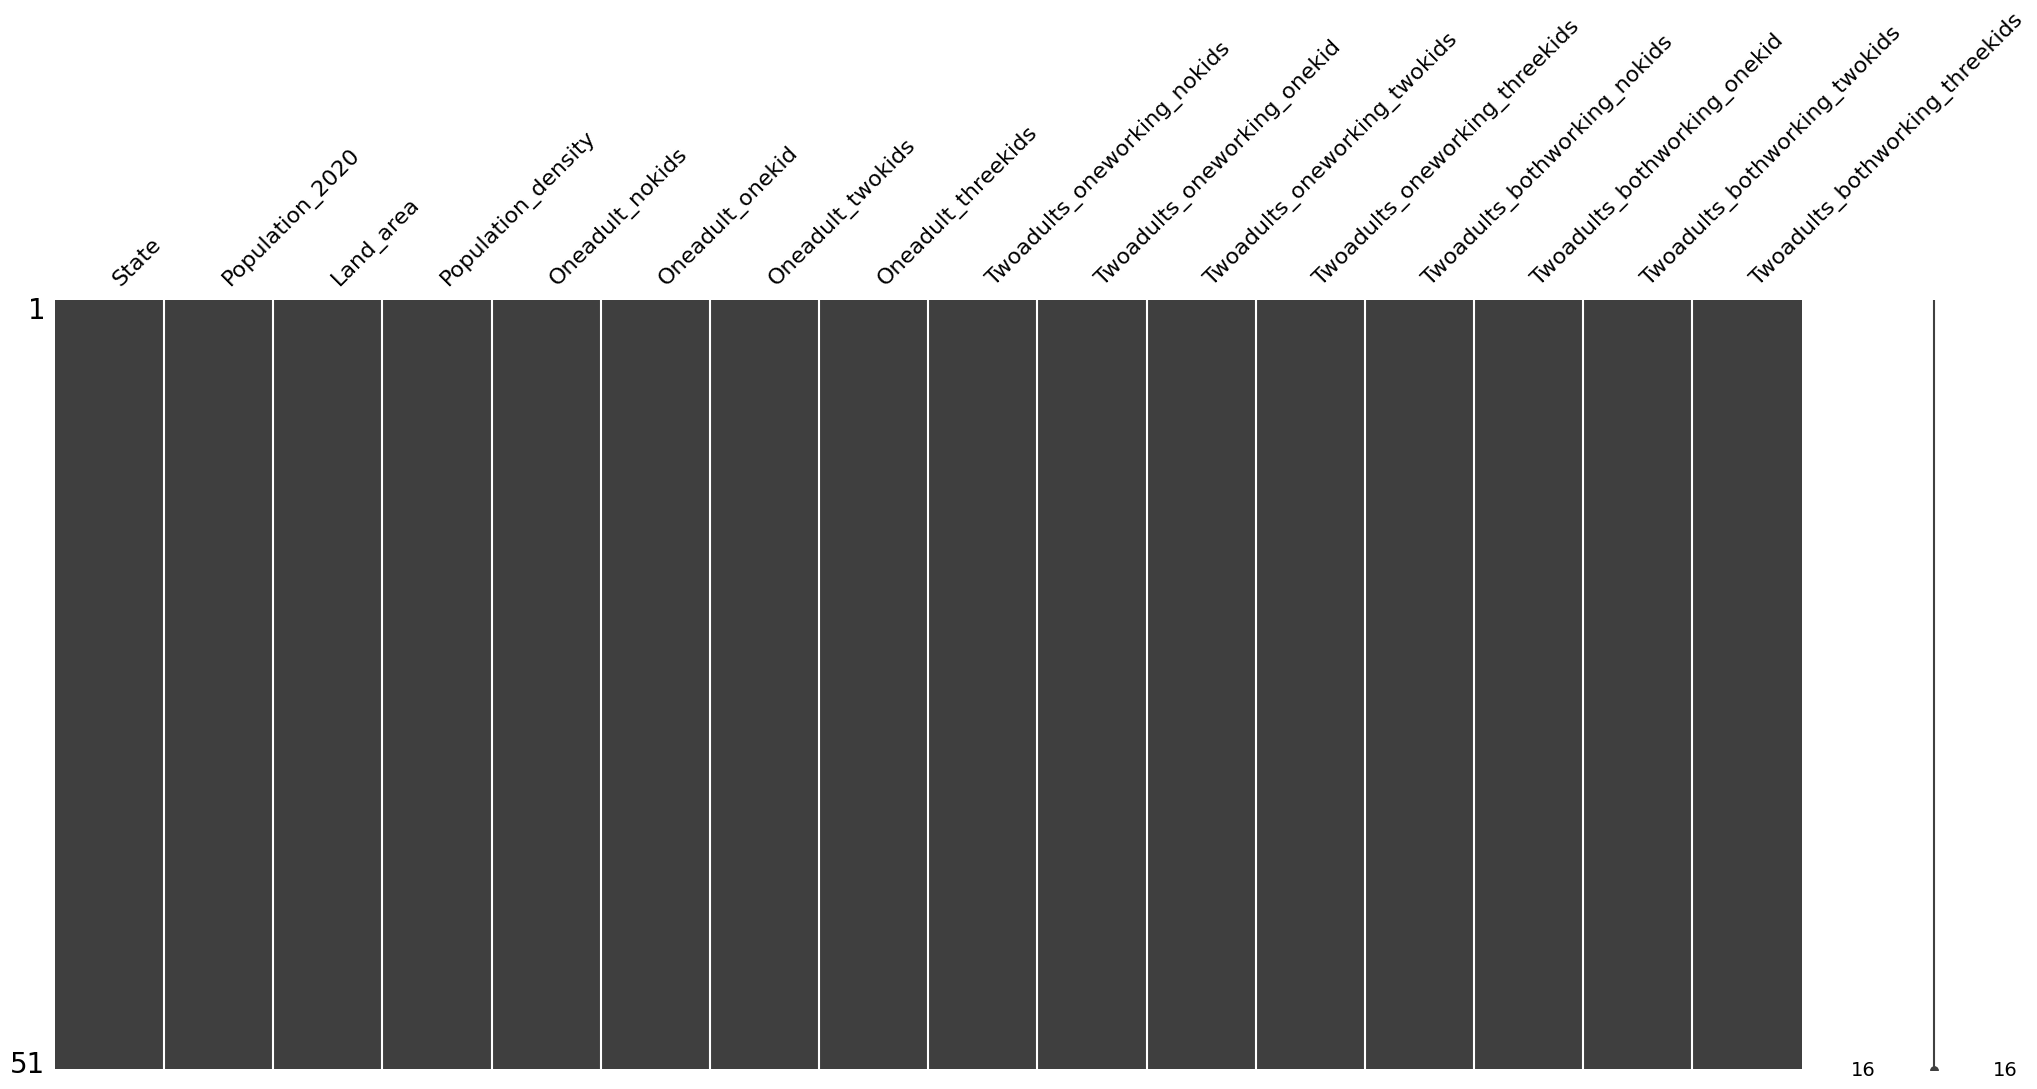

In [21]:
msno.matrix(living_wage)

To derive meaningful value from the all data in the column, we use average value for the rows with living wage.

In [22]:
avg_living_wage = (living_wage[['Oneadult_nokids','Oneadult_onekid',
                              'Oneadult_twokids', 'Oneadult_threekids', 'Twoadults_oneworking_nokids','Twoadults_oneworking_onekid', 'Twoadults_oneworking_twokids','Twoadults_oneworking_threekids', 'Twoadults_bothworking_nokids','Twoadults_bothworking_onekid', 'Twoadults_bothworking_twokids','Twoadults_bothworking_threekids']]
                              .astype(float)
                              .mean(axis=1))


living_wage['Average_living_wage'] = avg_living_wage

living_wage.sample(5)

,State,Population_2020,Land_area,Population_density,Oneadult_nokids,Oneadult_onekid,Oneadult_twokids,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage
29,New Hampshire,1377529,8952.65,153.87,14.47,30.07,37.78,49.19,22.90,27.55,30.96,34.06,11.45,16.37,20.68,24.83,26.692500
20,Maryland,6177224,9707.24,636.35,17.25,34.74,43.05,55.78,26.66,31.82,35.41,38.70,13.33,18.75,23.40,27.97,30.571667
18,Louisiana,4657757,43203.90,107.81,14.06,29.61,36.18,45.82,23.28,28.51,32.16,34.26,11.64,16.21,19.99,23.00,26.226667
25,Missouri,6154913,68741.52,89.54,13.72,28.65,34.97,44.47,22.97,27.84,31.55,33.74,11.48,15.74,19.41,22.33,25.572500
7,Delaware,989948,1948.54,508.05,15.32,32.17,39.67,50.91,24.66,30.18,33.85,36.62,12.33,17.50,21.75,25.54,28.375000


In [23]:
living_wage_per_year = living_wage['Average_living_wage'] * 2080
living_wage['Average_living_wage_year'] = living_wage_per_year

living_wage.sample(5)

,State,Population_2020,Land_area,Population_density,Oneadult_nokids,Oneadult_onekid,Oneadult_twokids,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage,Average_living_wage_year
38,Pennsylvania,13002700,44742.70,290.61,13.39,27.57,34.67,44.62,21.54,25.66,29.08,31.33,10.77,15.12,19.12,22.54,24.617500,51204.400000
2,Arizona,7151502,113594.08,62.96,14.94,29.01,35.11,45.59,24.30,28.69,32.42,36.13,12.15,15.99,19.51,23.01,26.404167,54920.666667
20,Maryland,6177224,9707.24,636.35,17.25,34.74,43.05,55.78,26.66,31.82,35.41,38.70,13.33,18.75,23.40,27.97,30.571667,63589.066667
28,Nevada,3104614,109781.18,28.28,13.67,28.98,36.61,48.40,22.97,26.85,30.40,33.92,11.48,15.91,20.16,24.41,26.146667,54385.066667
18,Louisiana,4657757,43203.90,107.81,14.06,29.61,36.18,45.82,23.28,28.51,32.16,34.26,11.64,16.21,19.99,23.00,26.226667,54551.466667


In [24]:
living_wage

csv_file_path = './data/living_wage_2020.csv'
living_wage.to_csv(csv_file_path, index=False)

## US Minimum Wage by State from 1968 to 2020

In [25]:
min_wage = pd.read_csv('./data/original_data/Minimum_Wage_Data.csv', encoding='latin1')

In [26]:
# Get the data info
min_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 2862 non-null   int64  
 1   State                                                2862 non-null   object 
 2   State.Minimum.Wage                                   2862 non-null   float64
 3   State.Minimum.Wage.2020.Dollars                      2862 non-null   float64
 4   Federal.Minimum.Wage                                 2862 non-null   float64
 5   Federal.Minimum.Wage.2020.Dollars                    2862 non-null   float64
 6   Effective.Minimum.Wage                               2862 non-null   float64
 7   Effective.Minimum.Wage.2020.Dollars                  2862 non-null   float64
 8   CPI.Average                                          2862 non-null  

#### Since we want to make sure that our column names are the same, we will change the columns into the suitable format.

Table of columns before and after modification:

|Before Modification | After Modification |
|---|---|
|*Year*| Year|
|*States*|States|
|*State.Minimum.Wage*| State_Minimum_Wage|
|*State.Minimum.Wage.2020.Dollars*|State_Minimum_Wage_2020_Dollars|
|*Federal.Minimum.Wage*| Federal_Minimum_Wage|
|*Federal.Minimum.Wage.2020.Dollars*| Federal_Minimum_Wage_2020_Dollars|
|*Effective.Minimum.Wage*| Effective_Minimum_Wage|
|*Effective.Minimum.Wage.2020.Dollars*| Effective_Minimum_Wage_2020_Dollars|
|*CPI.Average*| CPI_Average|
|*Department.Of.Labor.Uncleaned.Data*| Department_Of_Labor_Uncleaned_Data|
|*Department.Of.Labor.Cleaned.Low.Value*|  Department_Of_Labor_Cleaned_Low_Value|
|*Department.Of.Labor.Cleaned.Low.Value.2020.Dollars*| Department_Of_Labor_Cleaned_Low_Value_2020_Dollars|
|*Department.Of.Labor.Cleaned.High.Value*|Department_Of_Labor_Cleaned_High_Value|
|*Department.Of.Labor.Cleaned.High.Value.2020.Dollars*|Department_Of_Labor_Cleaned_High_Value_2020_Dollars|
|*Footnote*| Footnote|


In [27]:
# Replace dot sign with underscore sign
min_wage.columns = min_wage.columns.str.replace('.', '_', regex=False)

min_wage.columns

Index(['Year', 'State', 'State_Minimum_Wage',
       'State_Minimum_Wage_2020_Dollars', 'Federal_Minimum_Wage',
       'Federal_Minimum_Wage_2020_Dollars', 'Effective_Minimum_Wage',
       'Effective_Minimum_Wage_2020_Dollars', 'CPI_Average',
       'Department_Of_Labor_Uncleaned_Data',
       'Department_Of_Labor_Cleaned_Low_Value',
       'Department_Of_Labor_Cleaned_Low_Value_2020_Dollars',
       'Department_Of_Labor_Cleaned_High_Value',
       'Department_Of_Labor_Cleaned_High_Value_2020_Dollars', 'Footnote'],
      dtype='object')

#### Then we draw the missing value plot to see whether there are missing values

<Axes: >

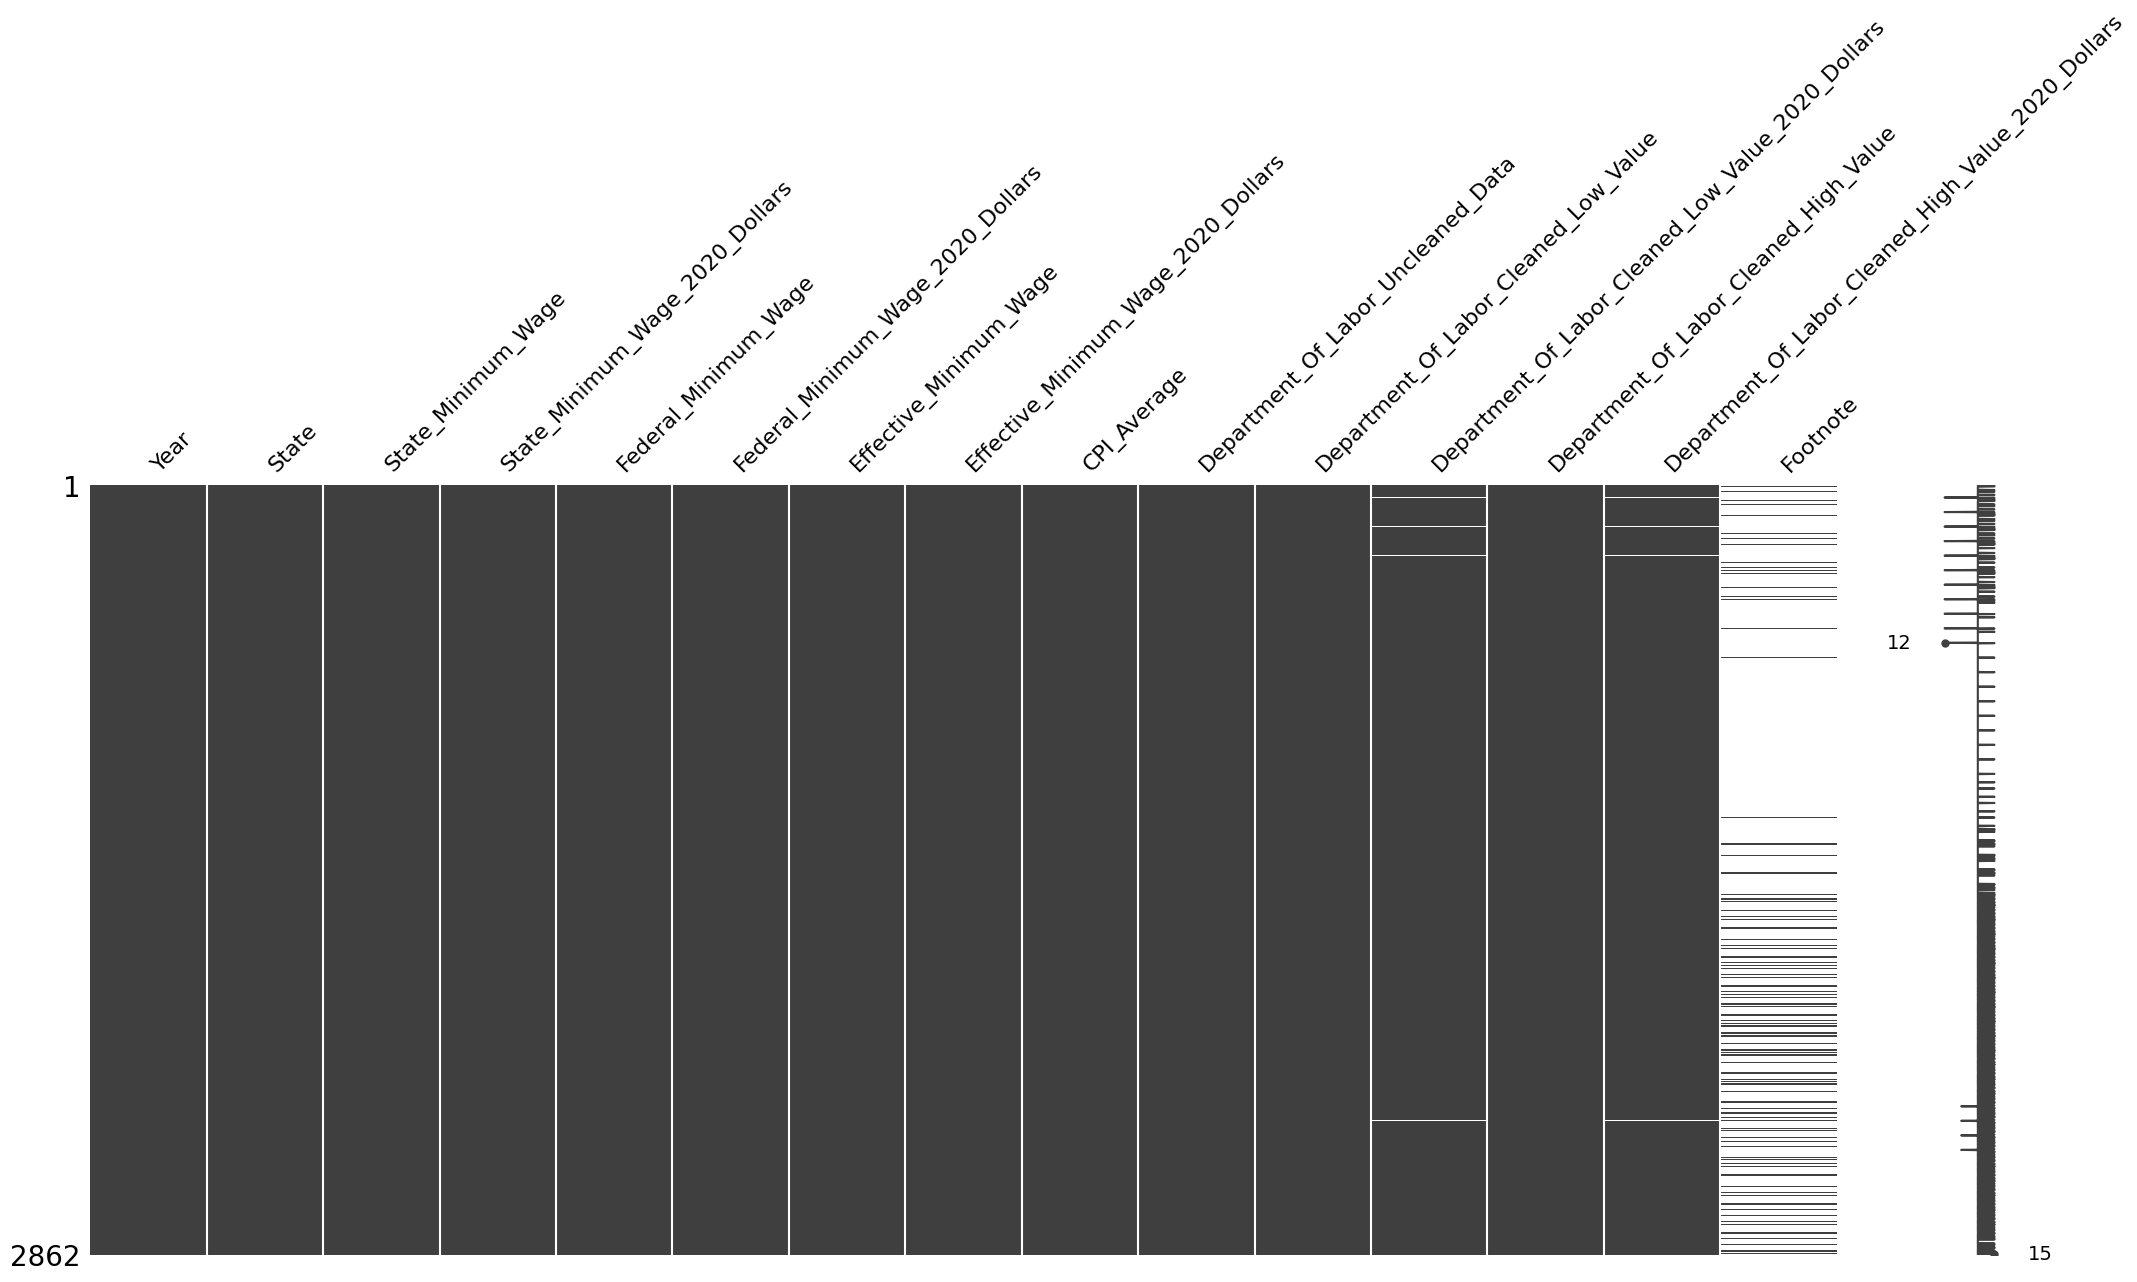

In [28]:
msno.matrix(min_wage)

 In the project, to investigate the effect of the minimum wage of each state on the number of H1B visas, we chose the analyzed time range to be from **2017 to 2020**.

After manipulating the dataset, the dataset contains the following characteristics:
* Numbers of observations: 216
* Numbers of features: 15

### Choose the time range from 2017 to 2020

In [29]:
min_wage_range = min_wage[(min_wage['Year'] >= 2017) & (min_wage['Year'] <= 2020)]
min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average,Department_Of_Labor_Uncleaned_Data,Department_Of_Labor_Cleaned_Low_Value,Department_Of_Labor_Cleaned_Low_Value_2020_Dollars,Department_Of_Labor_Cleaned_High_Value,Department_Of_Labor_Cleaned_High_Value_2020_Dollars,Footnote
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12,...,0.00,0.00,0.00,0.00,NaN
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12,9.8,9.80,10.34,9.80,10.34,NaN
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12,10,10.00,10.55,10.00,10.55,NaN
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12,8.50[c],8.50,8.97,8.50,8.97,[c]
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12,10,10.00,10.55,10.00,10.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25,7.25,7.25,7.25,[c]
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN


Then, since we do not need the raw scraped data and the upper and lower bond of the data, we will drop columns
`Department_Of_Labor_Uncleaned_Data`, `Department_Of_Labor_Cleaned_Low_Value`, `Department_Of_Labor_Cleaned_Low_Value_2020_Dollars`,
`Department_Of_Labor_Cleaned_High_Value`, `Department_Of_Labor_Cleaned_High_Value_2020_Dollars`, `Footnote`.

In [30]:
# Drop off the selected columns list above than create a new dataset
min_wage_range = min_wage_range.iloc[:,0:9]
min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12
...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66


#### Transform the hourly wage into year wage
Since the wage in the dataset is hourly wage, we will transform the columns into year wage for further analysis.
In this case we will assume that people work 40 hours per week, and 52 weeks per year, then we will create new columns base on the criteria mentioned.

The added columns for annual wage are `State_Minimum_Wage_Yearly`,  `State_Minimum_Wage_2020_Dollars_Yearly`, `Federal_Minimum_Wage_Yearly`, `Federal_Minimum_Wage_2020_Dollars_Yearly`, `Effective_Minimum_Wage_Yearly`, and `Effective_Minimum_Wage_2020_Dollars_Yearly`.

In [31]:
text = '_Yearly'
for col_name in min_wage_range.columns[2:8]:
    new_col_name = col_name + text
    min_wage_range[new_col_name] = min_wage_range[col_name] * 2080

min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average,State_Minimum_Wage_Yearly,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12,0.0,0.0,15080.0,15912.0,15080.0,15912.0
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12,20384.0,21507.2,15080.0,15912.0,20384.0,21507.2
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12,17680.0,18657.6,15080.0,15912.0,17680.0,18657.6
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,15080.0,15080.0,15080.0,15080.0,15080.0,15080.0
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,28080.0,28080.0,15080.0,15080.0,28080.0,28080.0
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,18200.0,18200.0,15080.0,15080.0,18200.0,18200.0
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,15080.0,15080.0,15080.0,15080.0,15080.0,15080.0


### Get data information
There are a total 216 observations and 15 columns in our dataset.

The columns after dealing with the dataset will be

|Column | Description |
|---|---|
|*Year*| The year of the data|
|*States*|The state of the data|
|*State_Minimum_Wage*| The state’s minimum wage of Jan 1st|
|*State_Minimum_Wage_2020_Dollars*| The state's minimum wage in 2020 dollar value|
|*Federal_Minimum_Wage*| The federal minimum wage as of January 1 of the given year|
|*Federal_Minimum_Wage_2020_Dollars*| The federal minimum wage in 2020 dollar value, adjusted for inflation|
|*Effective_Minimum_Wage*| The effective minimum wage in the state on January 1 of the given year, which is the higher of the state or federal minimum wage|
|*Effective_Minimum_Wage_2020_Dollars*| The effective minimum wage in 2020 dollar value, which is the higher of the state or federal minimum wage|
|*CPI_Average*| The average value of the Consumer Price Index in Year|
|*State_Minimum_Wage_Yearly*| The state’s minimum wage of Jan 1st in annual wage|
|*State_Minimum_Wage_2020_Dollars_Yearly*| The state's minimum wage in annual wage in 2020 dollar value|
|*Federal_Minimum_Wage_Yearly*| The federal minimum wage as of January 1 of the given year in annual wage|
|*Federal_Minimum_Wage_2020_Dollars_Yearly*| The federal minimum wage in annual wage in 2020 dollar value, adjusted for inflation|
|*Effective_Minimum_Wage_Yearly*| The effective minimum wage in the state on January 1 of the given year in annual wage, which is the higher of the state or federal minimum wage|
|*Effective_Minimum_Wage_2020_Dollars_Yearly*| The effective minimum wage in annual wage in 2020 dollar value, which is the higher of the state or federal minimum wage|


In [32]:
min_wage_range.shape

(216, 15)

Save the dataset as a csv file for future use.

In [33]:
min_wage_range.to_csv('./data/minimum_wage_data_ver3.csv')

### Check for missing values
After we dropped the columns, there will be no missing values in the dataset.

In [34]:
min_wage_range.isnull().sum()

Year                                          0
State                                         0
State_Minimum_Wage                            0
State_Minimum_Wage_2020_Dollars               0
Federal_Minimum_Wage                          0
Federal_Minimum_Wage_2020_Dollars             0
Effective_Minimum_Wage                        0
Effective_Minimum_Wage_2020_Dollars           0
CPI_Average                                   0
State_Minimum_Wage_Yearly                     0
State_Minimum_Wage_2020_Dollars_Yearly        0
Federal_Minimum_Wage_Yearly                   0
Federal_Minimum_Wage_2020_Dollars_Yearly      0
Effective_Minimum_Wage_Yearly                 0
Effective_Minimum_Wage_2020_Dollars_Yearly    0
dtype: int64

<Axes: >

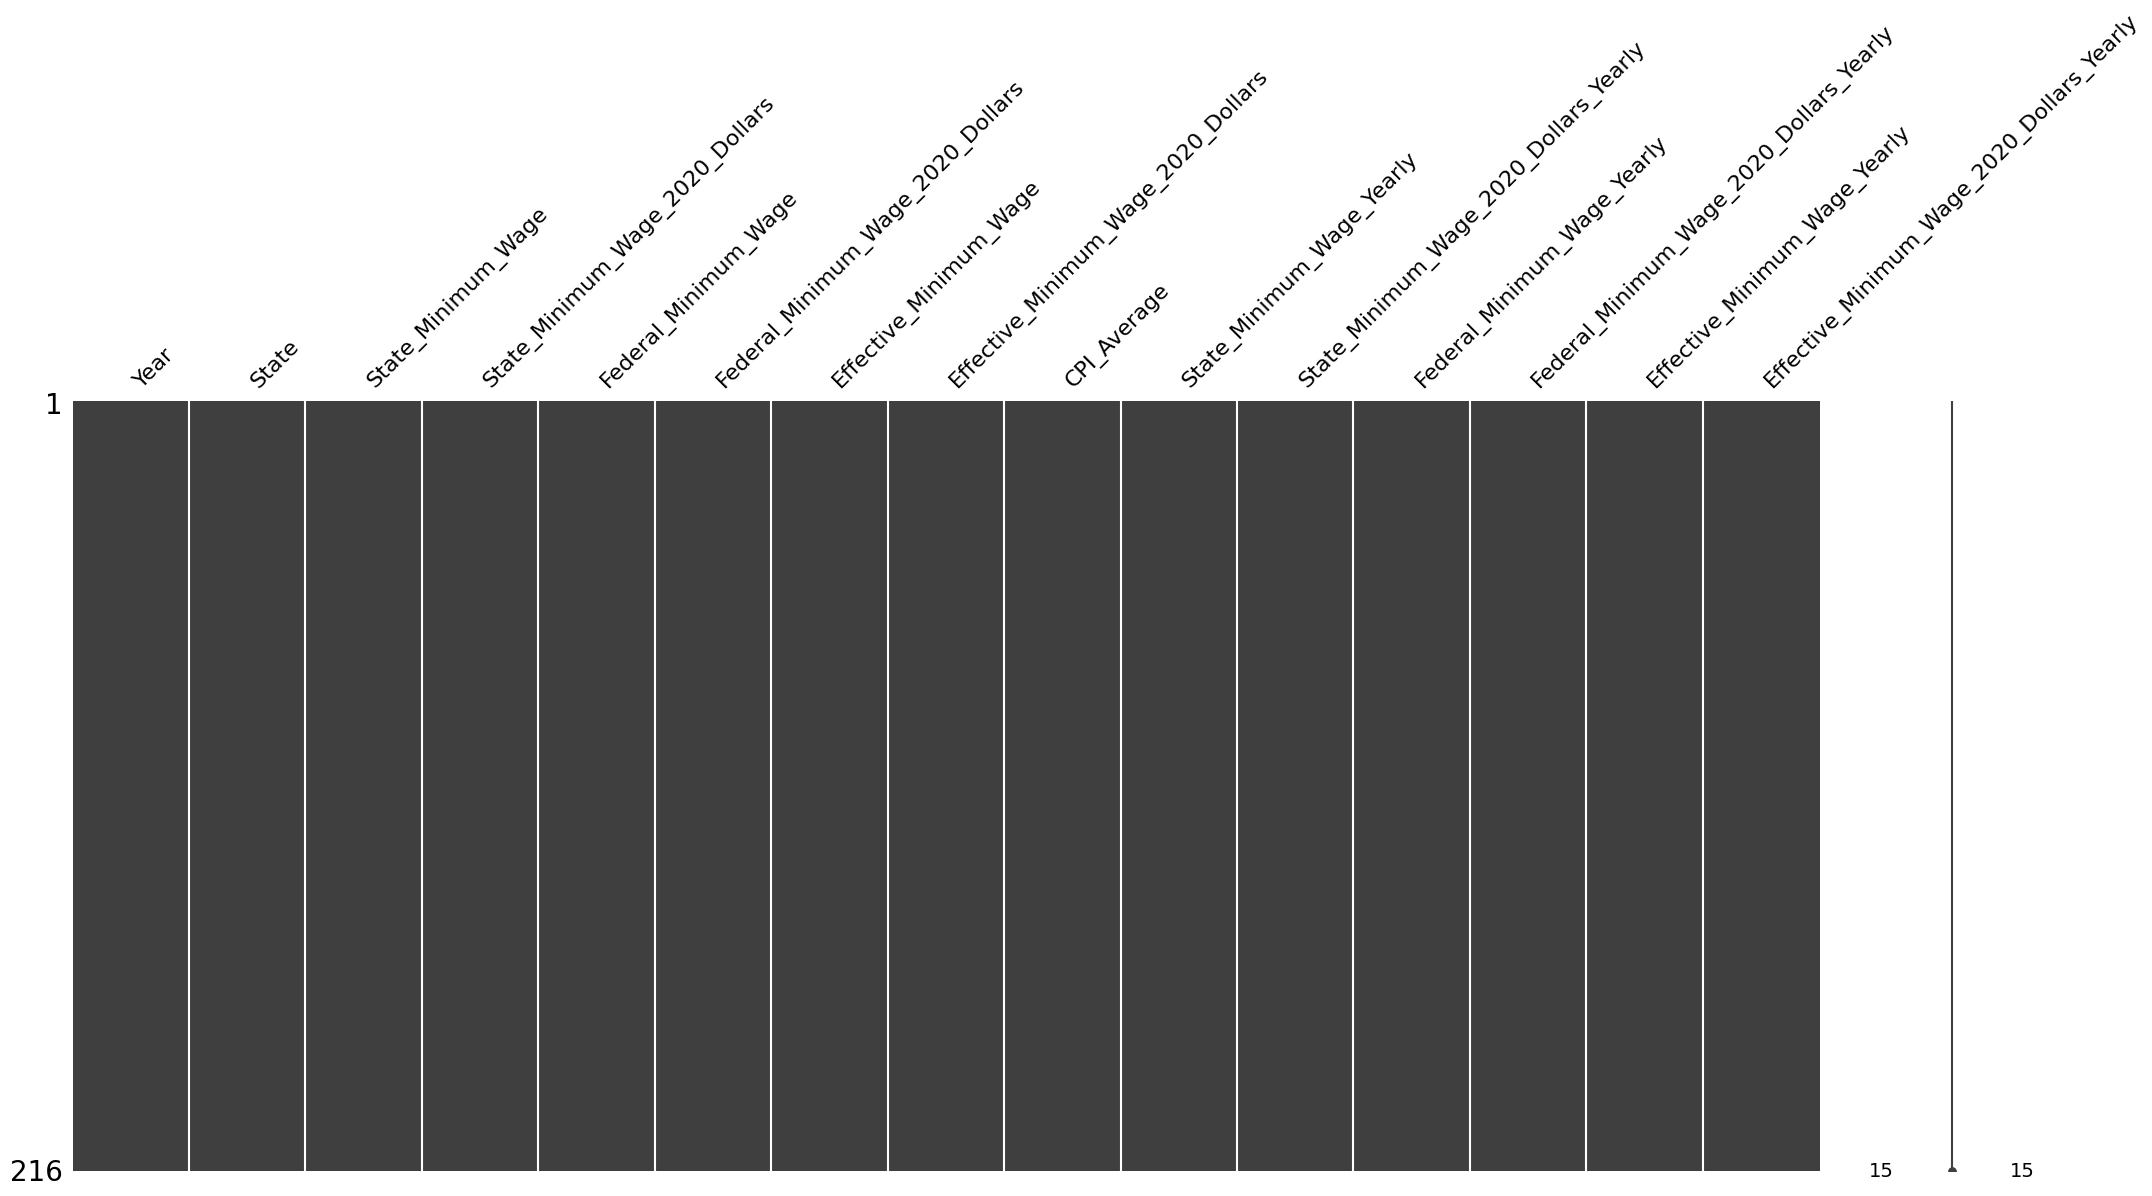

In [35]:
msno.matrix(min_wage_range)

---


# Data Visualization

### H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022

Text(0, 0.5, 'Number of visa applications')

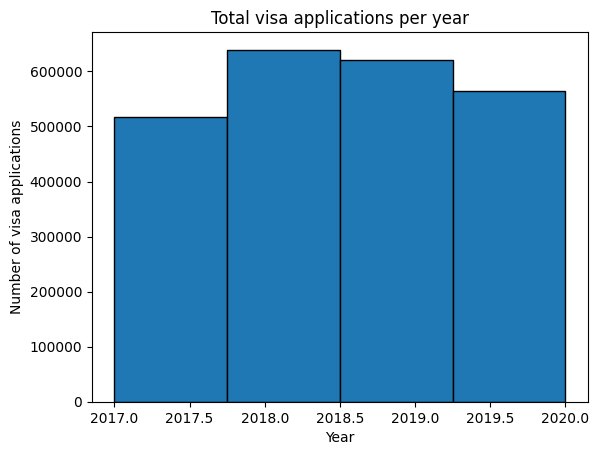

In [36]:
plt.hist(H1B_USA["Year"], bins=4, edgecolor='black')
plt.title("Total visa applications per year")
plt.xlabel("Year")
plt.ylabel("Number of visa applications")

The bar chart analysis by year shows that 2018 and 2019 are peak years for the number of applications submitted. This trend indicates a significant surge in applications during these years, highlighting a period of heightened demand or interest in the process.

In [37]:
workerStates = H1B_USA.groupby('Worksite_state').size().sort_values(ascending=False).head(10)
workerStates

Worksite_state
California       344753
Texas            183081
New York         144198
New Jersey       111058
Illinois          88102
Washington        80856
Massachusetts     71016
Pennsylvania      65427
Georgia           63604
Florida           59358
dtype: int64

Text(0.5, 0, 'Number of visa applications')

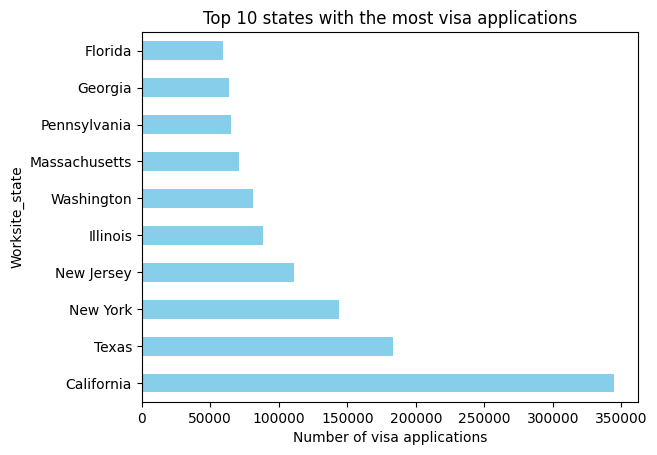

In [38]:
workerStates.plot(kind='barh', color='skyblue')
plt.title("Top 10 states with the most visa applications")
plt.xlabel("Number of visa applications")

In [39]:
EmpStates = H1B_USA.groupby('Employer_state').size().sort_values(ascending=False).head(10)
EmpStates

Employer_state
California       413083
Texas            325595
New Jersey       289892
New York         151944
Illinois         143114
Pennsylvania     106974
Michigan          92737
Massachusetts     91718
Washington        90125
Maryland          78626
dtype: int64

Text(0.5, 0, 'Number of visa applications')

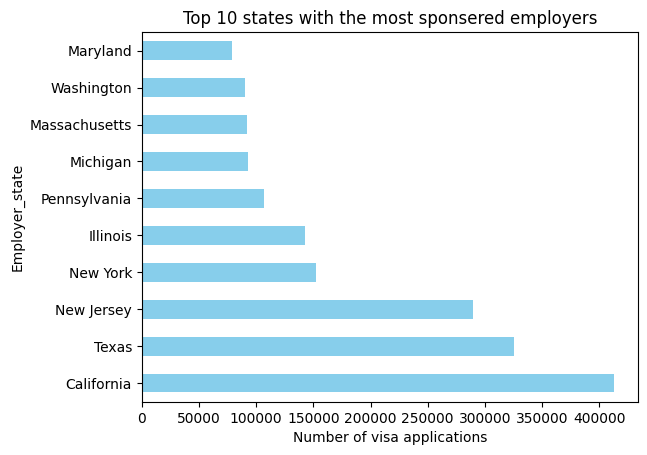

In [40]:
EmpStates.plot(kind='barh', color='skyblue')
plt.title("Top 10 states with the most sponsered employers")
plt.xlabel("Number of visa applications")

The analysis of the two charts reveals that **California** consistently ranks as the state with the highest number of visa applications and sponsored employers, followed closely by **Texas**. Interestingly, **New Jersey** surpasses **New York** in terms of sponsored employers, yet New York outnumbers New Jersey in the count of visa applicants. Additionally, it's noted that **Michigan**, despite being among the top 10 states for the number of applications submitted by companies, does not have a proportionately high number of workers in the state. This discrepancy suggests a unique dynamic in the distribution of visa applicants and sponsored employment across these states.

In [41]:
year_State = H1B_USA.groupby(['Year', 'Worksite_state']).size().unstack()
year_State

Worksite_state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2017,1471,171,7954,2392,98344,5272,6811,2826,3291,18236,...,5673,55869,43,2519,331,14994,19614,430,5430,111
2018,1888,177,9909,3499,124255,7132,8796,3915,4091,22660,...,7189,63683,38,3168,431,18355,26061,525,6637,173
2019,150,13,1103,385,9815,626,771,235,348,1730,...,542,5206,4,247,34,1601,3526,44,564,6
2020,1698,84,9972,4133,112339,6242,8587,2884,3630,16732,...,6375,58323,59,2946,224,16634,31655,422,5464,78


In [42]:
top_states_by_year = pd.DataFrame()
year = 2017
for index, row in year_State.iterrows():
    """ if type(index) == int:
        print(type(index)) """

    top_states = row.nlargest(10)
    top_states_df = top_states.to_frame()
    top_states_df = top_states_df.reset_index()
    top_states_df.rename(columns={'index': 'Year'}, inplace=True)
    top_states_df['Year'] = year
    top_states_df = top_states_df.set_axis(['Worksite_state', 'Count', 'Year'], axis=1)


    year += 1

    top_states_by_year = pd.concat([top_states_by_year, top_states_df])

/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/3403923088.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


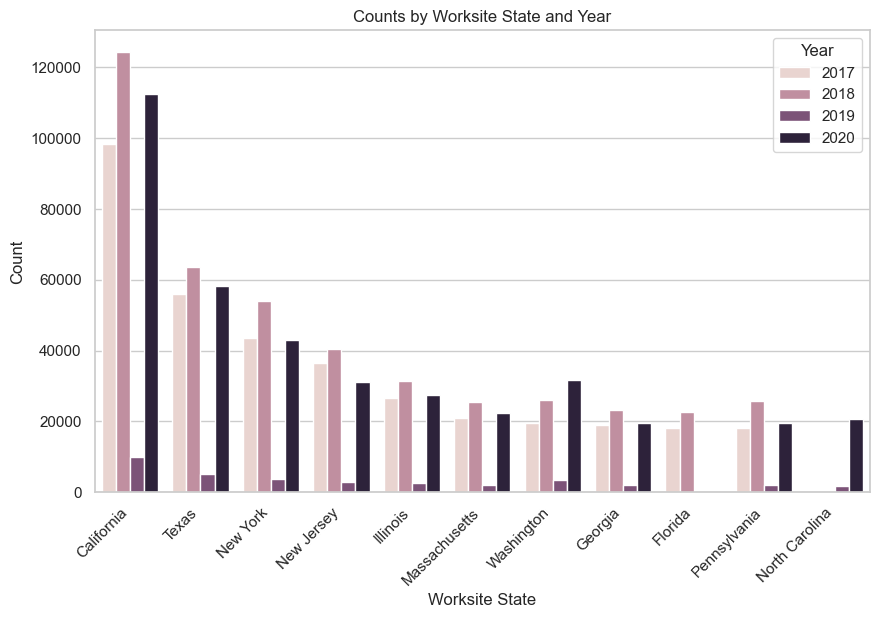

In [43]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar chart with 'Worksite_state' on the x-axis, 'Count' on the y-axis, and differentiate by 'Year'
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Worksite_state", y="Count", hue="Year", data=top_states_by_year)

# Add a title and labels
plt.title('Counts by Worksite State and Year')
plt.xlabel('Worksite State')
plt.ylabel('Count')

# Rotate the labels on the x-axis for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

The bar chart depicts the count of workers by worksite state across four consecutive years: 2017, 2018, 2019, and 2020. From the visualization, several trends and observations can be made:

**California** consistently shows the highest count of workers among the states listed across all four years, with a notable peak in 2018.

**Texas** follows as the second state with a high count of workers, experiencing a rise from 2017 to 2018.

**New York** and **New Jersey** both show similar trends with a peak in 2018. However, New York consistently has a higher count compared to New Jersey.

### Living Wage - 50 States

Plotting the average living wage by state in the US by descending order

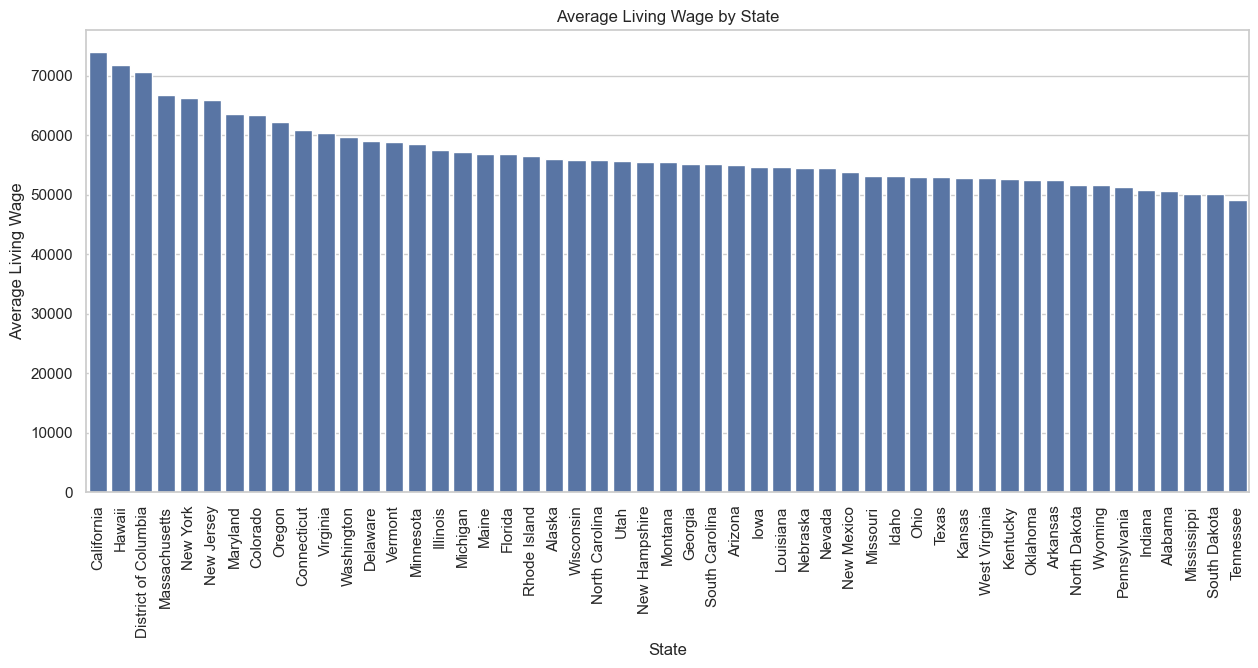

In [44]:
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Average_living_wage_year', data=living_wage.sort_values('Average_living_wage_year', ascending=False))
plt.xticks(rotation=90)
plt.title('Average Living Wage by State')
plt.xlabel('State')
plt.ylabel('Average Living Wage')
plt.show()

The analysis of the bar charts shows that california has the highest living wage in US dollars per hour.

In [45]:
living_wage['Average_living_wage'].describe()

count    51.000000
mean     27.317353
std       2.757888
min      23.592500
25%      25.412917
50%      26.690000
75%      28.335417
max      35.555000
Name: Average_living_wage, dtype: float64

<Figure size 1500x600 with 0 Axes>

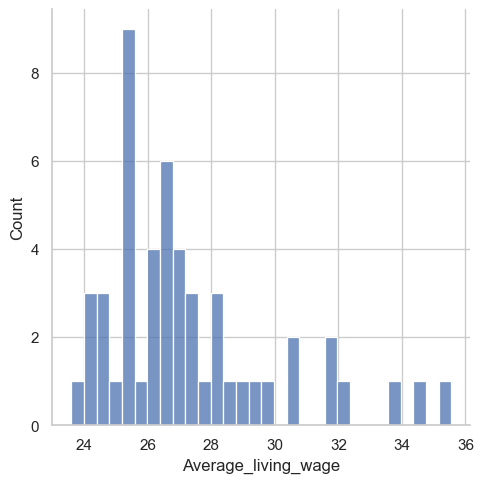

In [46]:
plt.figure(figsize=(15, 6))
sns.displot(living_wage['Average_living_wage'], bins=30)

### US Minimum Wage by State from 1968 to 2020

#### Effective Minimum Wage by Year
In the plot, we draw a box plot of the distribution of `Effective_Minimum_Wage` by the year 2017 to 2020. We discover that the median value of effective minimum wage has increased through 2017 to 2020.

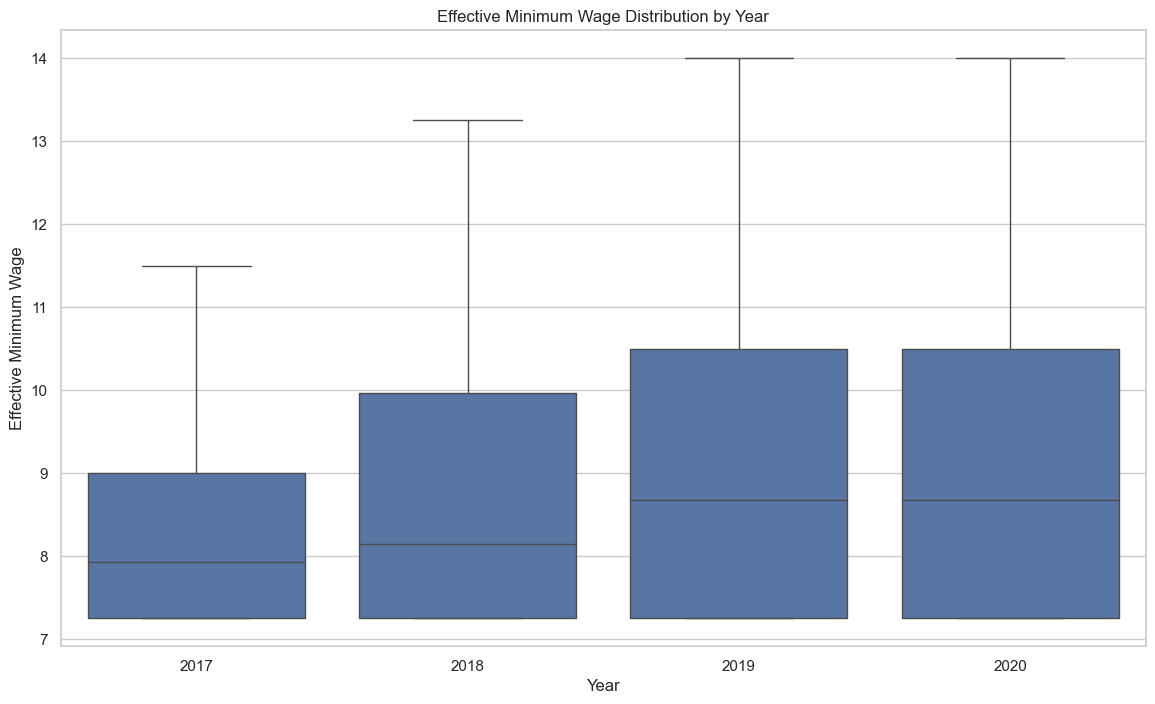

In [47]:
# Boxplot of state minimum wages by year
plt.figure(figsize=(14, 8))
sns.boxplot(data=min_wage_range, x='Year', y='Effective_Minimum_Wage')
plt.title('Effective Minimum Wage Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Effective Minimum Wage')
plt.xticks(rotation=0) # Rotate the x-axis labels for better readability
plt.show()

#### Top 10 States with the Highest Effective Minimum Annual Wage from 2017 to 2020
In this plot, we want to see whether top 10 highest states of effective minimum annual wage will change over years. Through the bar plot, we discover that **District of Columbia** has the highest minimum wage through 2017-2020, while **Washington state** has the second highest minimum wage through 2018 to 2020.

/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/2937649798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='State', y='Effective_Minimum_Wage_Yearly', palette='mako')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/2937649798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='State', y='Effective_Minimum_Wage_Yearly', palette='mako')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/2937649798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='State', y='Effective_Minimum_Wage_Yearly', palette='mako')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called 

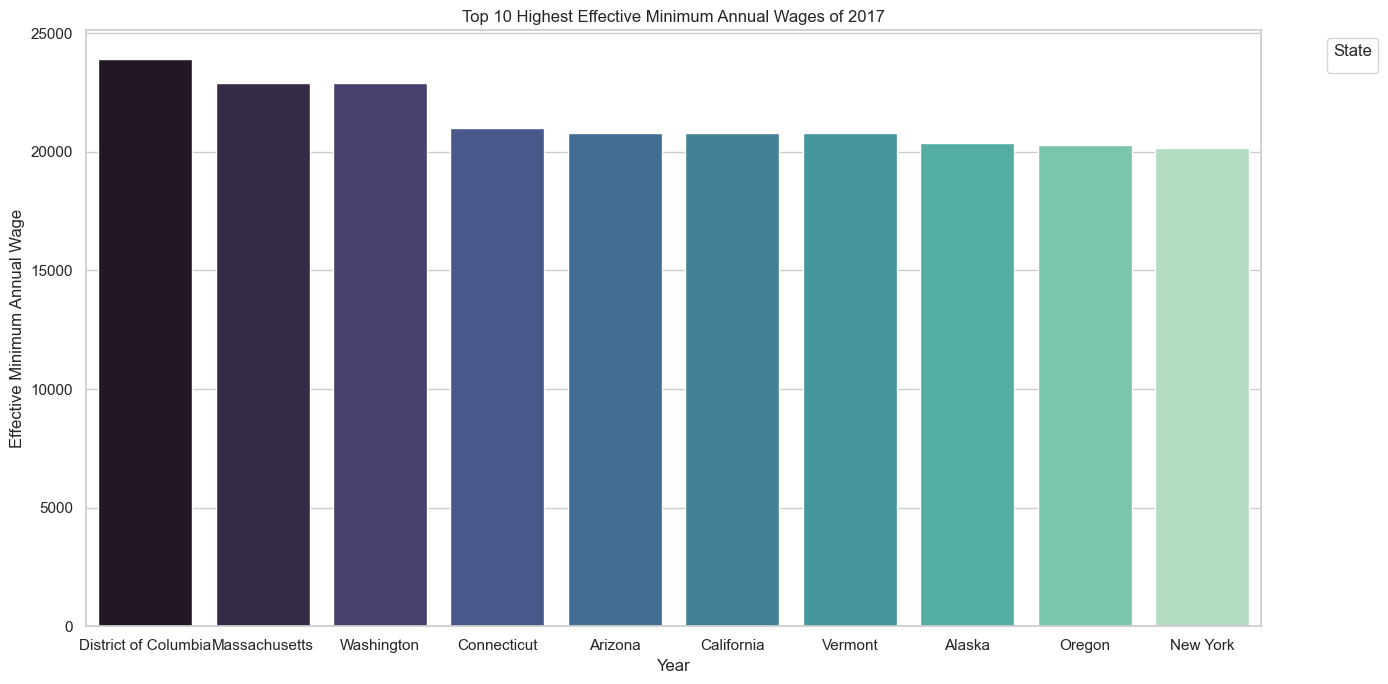

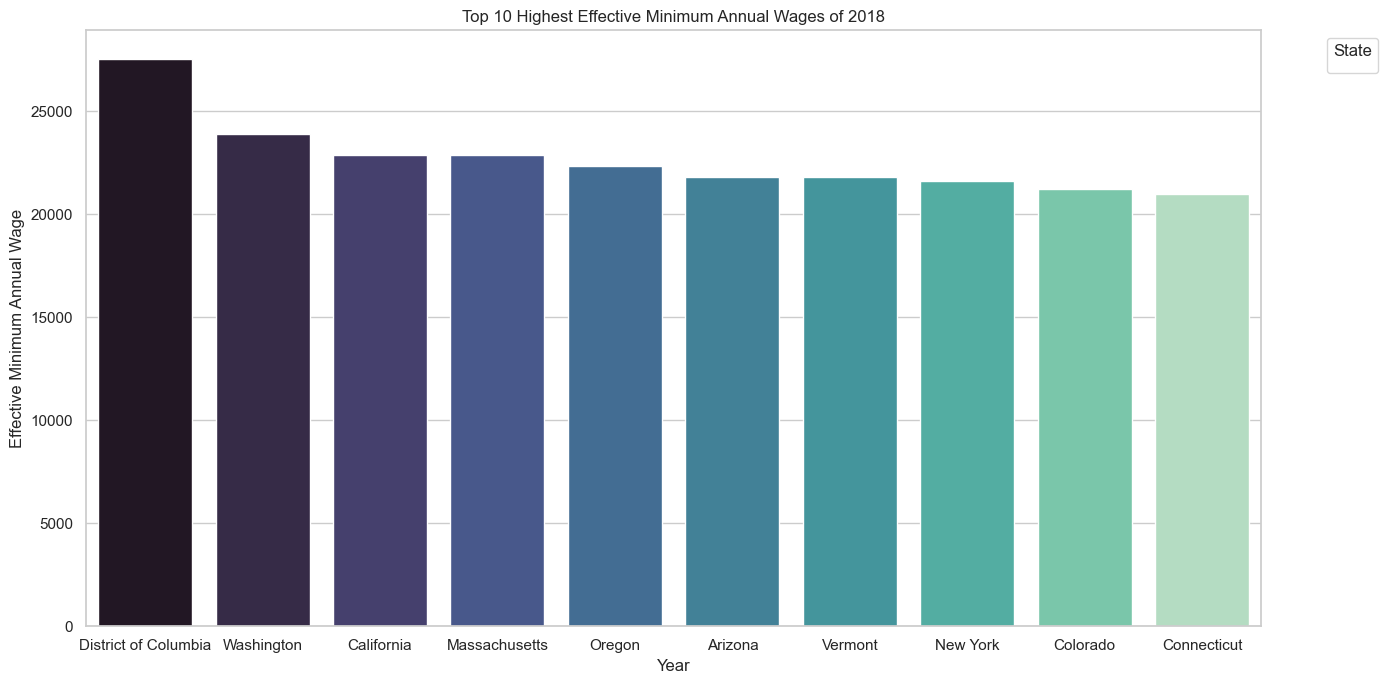

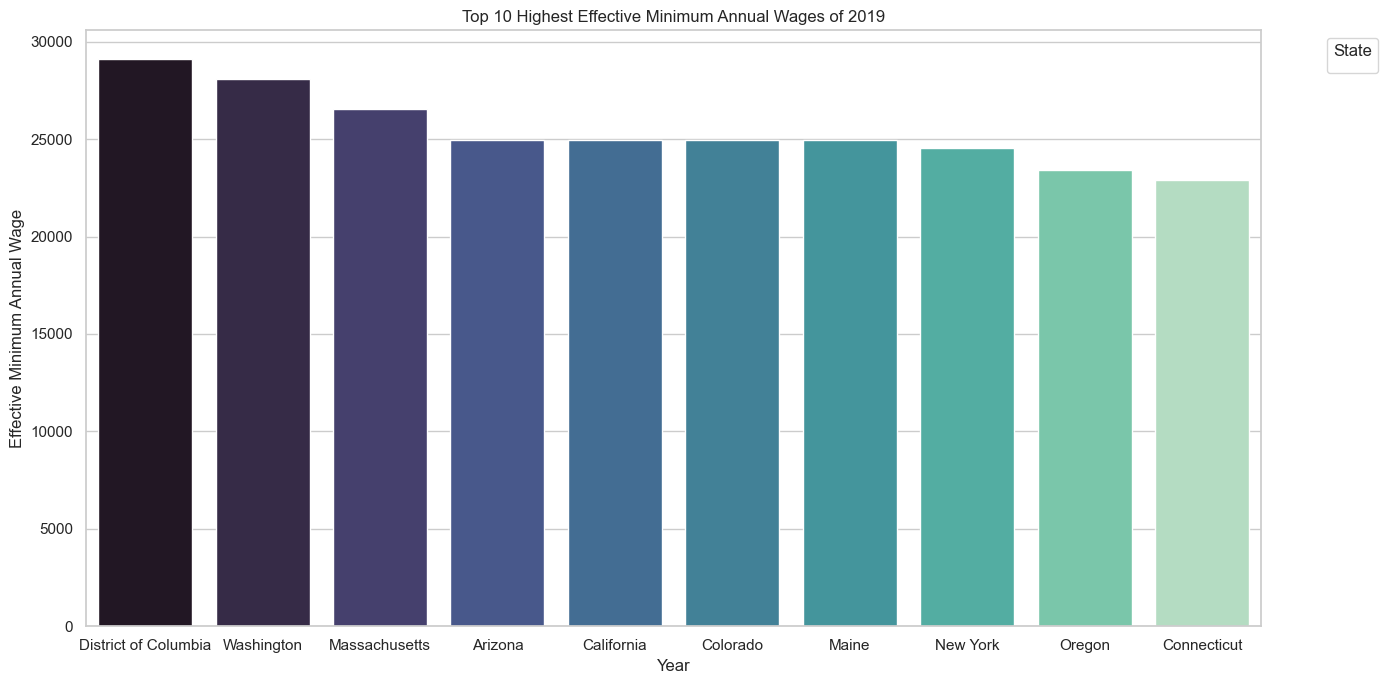

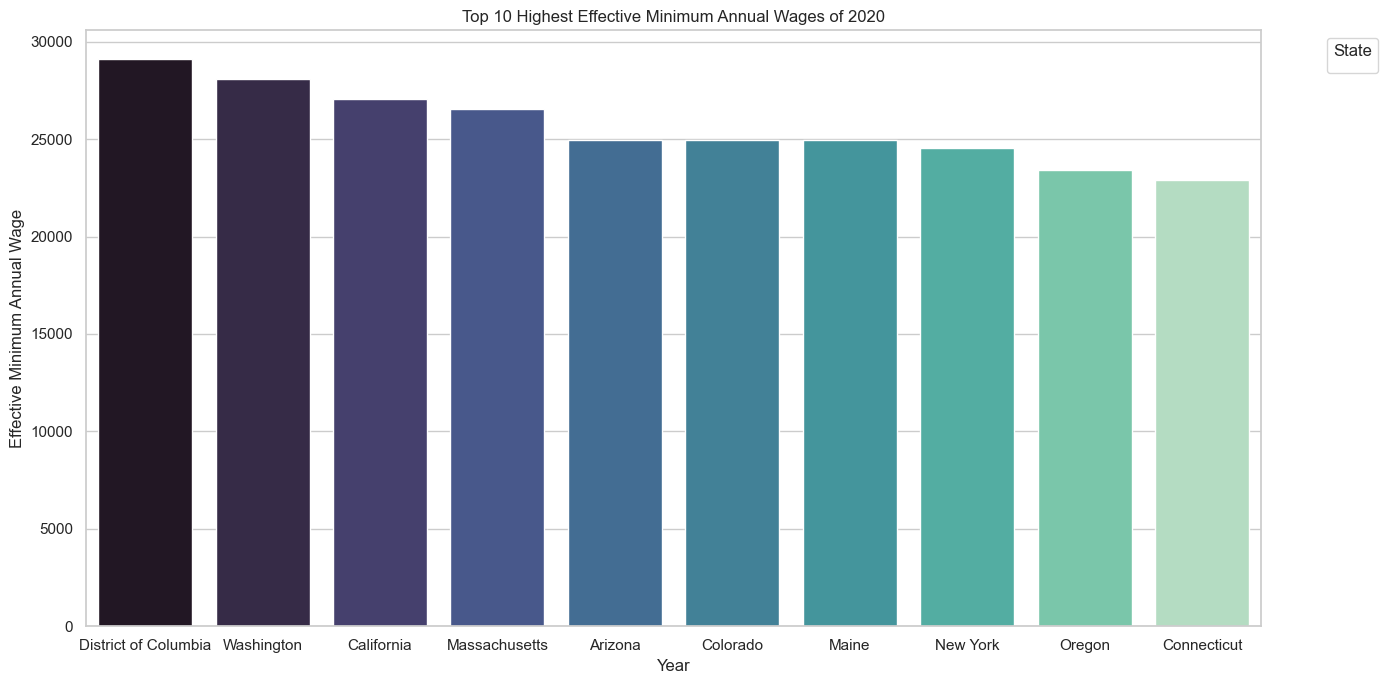

In [48]:
top_wages_by_year = min_wage_range.groupby('Year').apply(lambda x: x.nlargest(10, 'Effective_Minimum_Wage_Yearly')).reset_index(drop=True)


for i in range(4):
    data = top_wages_by_year[top_wages_by_year.Year == 2017+i]

    plt.figure(figsize=(14, 7))
    sns.barplot(data=data, x='State', y='Effective_Minimum_Wage_Yearly', palette='mako')
    plt.title(f'Top 10 Highest Effective Minimum Annual Wages of {2017+i}')
    plt.xlabel('Year')
    plt.ylabel('Effective Minimum Annual Wage')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()

---

## Merge the data

To use the data efficiently, we use the saved data that we manipulated earlier.

In [49]:
#import saved data
H1B_USA = pd.read_csv('./data/H1B_cleaned_0219.csv')
living_wage = pd.read_csv('./data/living_wage_2020.csv')
min_wage_range = pd.read_csv('./data/minimum_wage_data_ver3.csv')

/var/folders/5l/_8zprv5n4jv6nq_y_k8qg04m0000gn/T/ipykernel_27580/843303299.py:2: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  H1B_USA = pd.read_csv('./data/H1B_cleaned_0219.csv')


In [50]:
H1B_USA.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,Year,Worksite_city,Worksite_state,Employer_city,Employer_state
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.0,Year,"Riverwoods, Illinois",CERTIFIED-WITHDRAWN,2017,Riverwoods,Illinois,Riverwoods,Illinois
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.0,Year,"Riverwoods, Illinois",CERTIFIED-WITHDRAWN,2017,Riverwoods,Illinois,Riverwoods,Illinois
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.0,Year,"Washington, District of Columbia",CERTIFIED-WITHDRAWN,2017,Washington,District of Columbia,Washington,District of Columbia
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.0,Year,"Livonia, Michigan",WITHDRAWN,2017,Jersey City,New Jersey,Livonia,Michigan
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.0,Year,"Wilson, North Carolina",CERTIFIED-WITHDRAWN,2017,New York,New York,Wilson,North Carolina


In [51]:
living_wage.head()

,State,Population_2020,Land_area,Population_density,Oneadult_nokids,Oneadult_onekid,Oneadult_twokids,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage,Average_living_wage_year
0,Alabama,5024279,50645.33,99.21,13.77,27.06,33.09,42.01,22.30,26.44,30.04,31.99,11.15,14.92,18.42,21.09,24.356667,50661.866667
1,Alaska,733391,570640.95,1.29,15.06,29.86,37.09,48.86,23.38,28.12,31.66,35.57,11.69,16.34,20.40,24.64,26.889167,55929.466667
2,Arizona,7151502,113594.08,62.96,14.94,29.01,35.11,45.59,24.30,28.69,32.42,36.13,12.15,15.99,19.51,23.01,26.404167,54920.666667
3,Arkansas,3011524,52035.48,57.87,13.29,28.23,34.85,44.48,22.50,27.15,30.85,32.89,11.25,15.54,19.35,22.33,25.225833,52469.733333
4,California,39538223,155779.22,253.81,18.66,40.34,50.00,66.02,30.26,36.85,40.83,46.49,15.13,21.76,27.08,33.24,35.555000,73954.400000


In [52]:
min_wage_range.head()

,Unnamed: 0,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average,State_Minimum_Wage_Yearly,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly
0,2646,2017,Alabama,0.0,0.00,7.25,7.65,7.25,7.65,245.12,0.0,0.0,15080.0,15912.0,15080.0,15912.0
1,2647,2017,Alaska,9.8,10.34,7.25,7.65,9.80,10.34,245.12,20384.0,21507.2,15080.0,15912.0,20384.0,21507.2
2,2648,2017,Arizona,10.0,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0
3,2649,2017,Arkansas,8.5,8.97,7.25,7.65,8.50,8.97,245.12,17680.0,18657.6,15080.0,15912.0,17680.0,18657.6
4,2650,2017,California,10.0,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0


Merge H1B_USA with min_wage_range by Year to Year and Worksite_state to State in the column with 'how = left' method

In [53]:
merge_min_wage_H1B_first = pd.merge(H1B_USA, min_wage_range, left_on=['Year', 'Worksite_state'], right_on=['Year', 'State'], how='left')

checking the missing values

<Axes: >

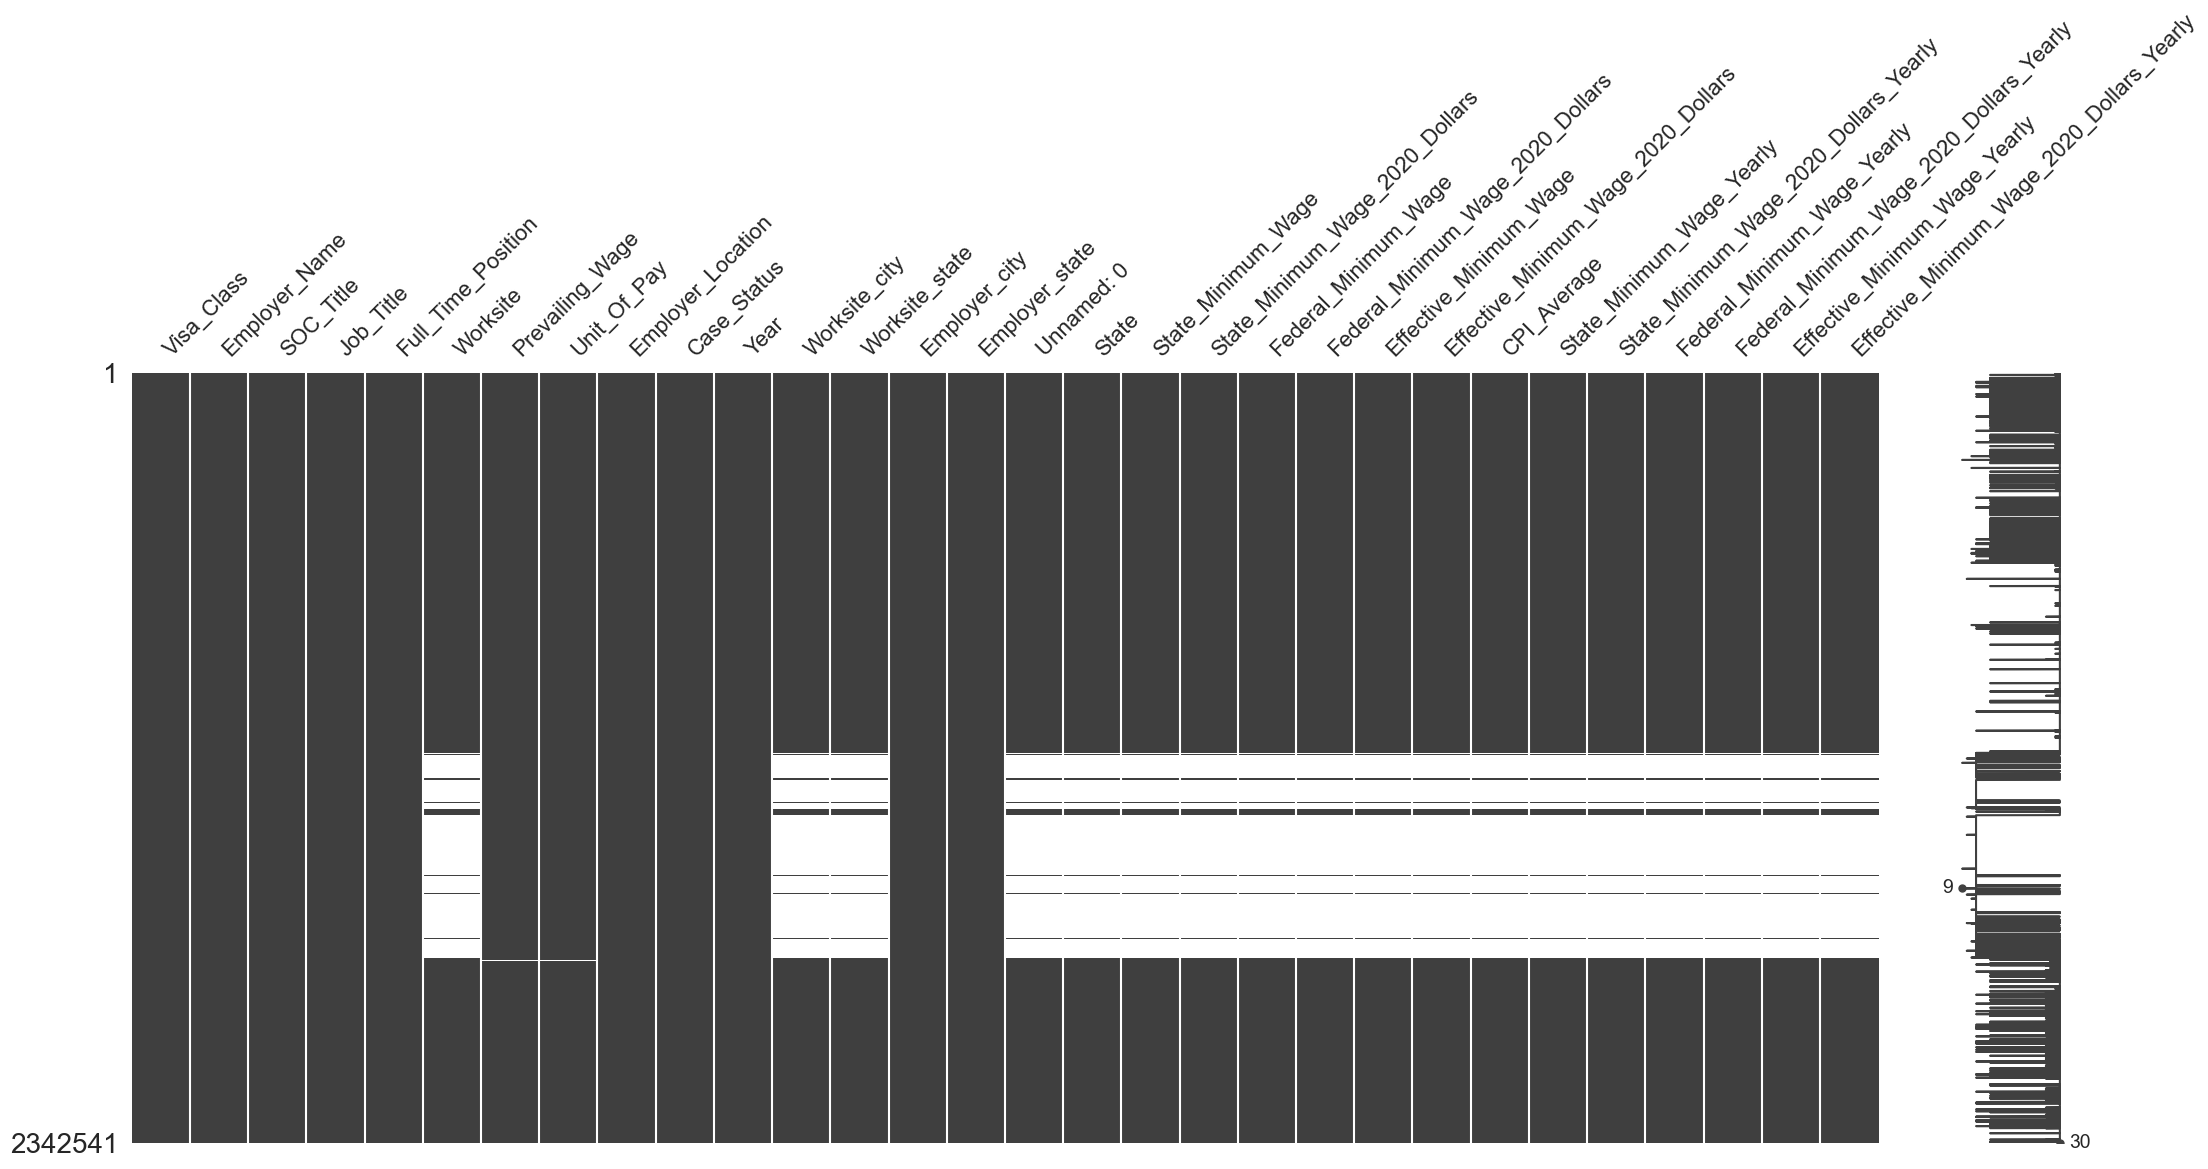

In [54]:
msno.matrix(merge_min_wage_H1B_first)

As mentioned before there are lots of missing values in the worksite column, so we will drop the rows with missing values in the worksite column and the prevailing wage column

In [55]:
merge_min_wage_H1B = merge_min_wage_H1B_first.dropna()

# Data visualization with the merged Dataset

Show the scatter plot between the number of H1B visa and Minimum living wage of that state by Year

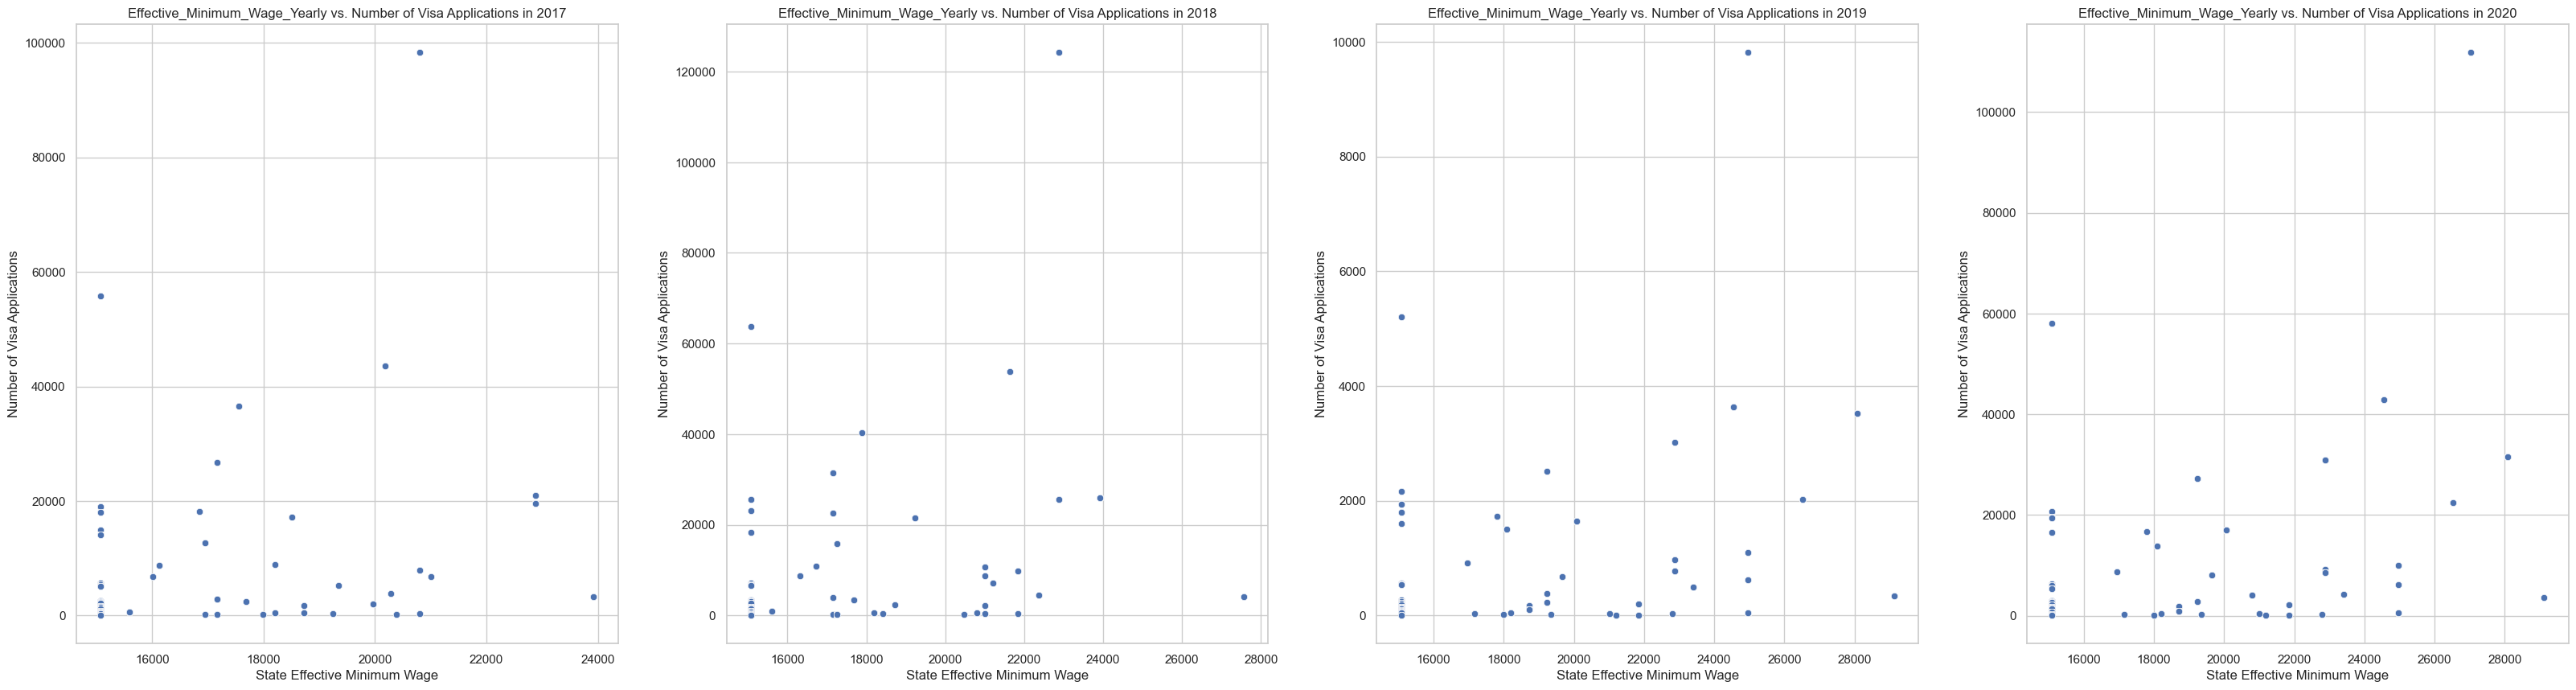

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [56]:
years = [2017, 2018, 2019, 2020]

fig, axs = plt.subplots(1, len(years), figsize=(10*len(years), 10))

# Create a scatter plot
for i, year in enumerate(years):
    merge_min_wage_H1B_each = merge_min_wage_H1B[merge_min_wage_H1B['Year'] == year]
    state_counts_each = merge_min_wage_H1B_each['State'].value_counts()

    state_counts_df = pd.DataFrame({'State': state_counts_each.index, 'Count': state_counts_each.values})

    df = pd.merge(state_counts_df, merge_min_wage_H1B_each[['State', 'Effective_Minimum_Wage_Yearly']], how='left', on='State')


    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='Effective_Minimum_Wage_Yearly', y='Count', data=df, ax=axs[i])
    axs[i].set_title(f'Effective_Minimum_Wage_Yearly vs. Number of Visa Applications in {year}')
    axs[i].set_ylabel('Number of Visa Applications')
    axs[i].set_xlabel('State Effective Minimum Wage')

plt.tight_layout()
plt.show()


The x-axis's value range seems to be increasing over the year which implies minimum wage has been increased over the year.

In 2019 there were lots of value missing in worksite value which cause the 2019's y-axis scale lower.



# Merge the data only for 2020

As the living wage is only for 2020, extract out the 2020 data

In [57]:
merge_min_wage_H1B_2020 = merge_min_wage_H1B[merge_min_wage_H1B['Year'] == 2020]

Merge data by Worksite_state to State by "how = left" method

In [58]:
merge_min_wage_H1B_living_wage = pd.merge(merge_min_wage_H1B_2020, living_wage, left_on='Worksite_state', right_on='State', how='left')

<Axes: >

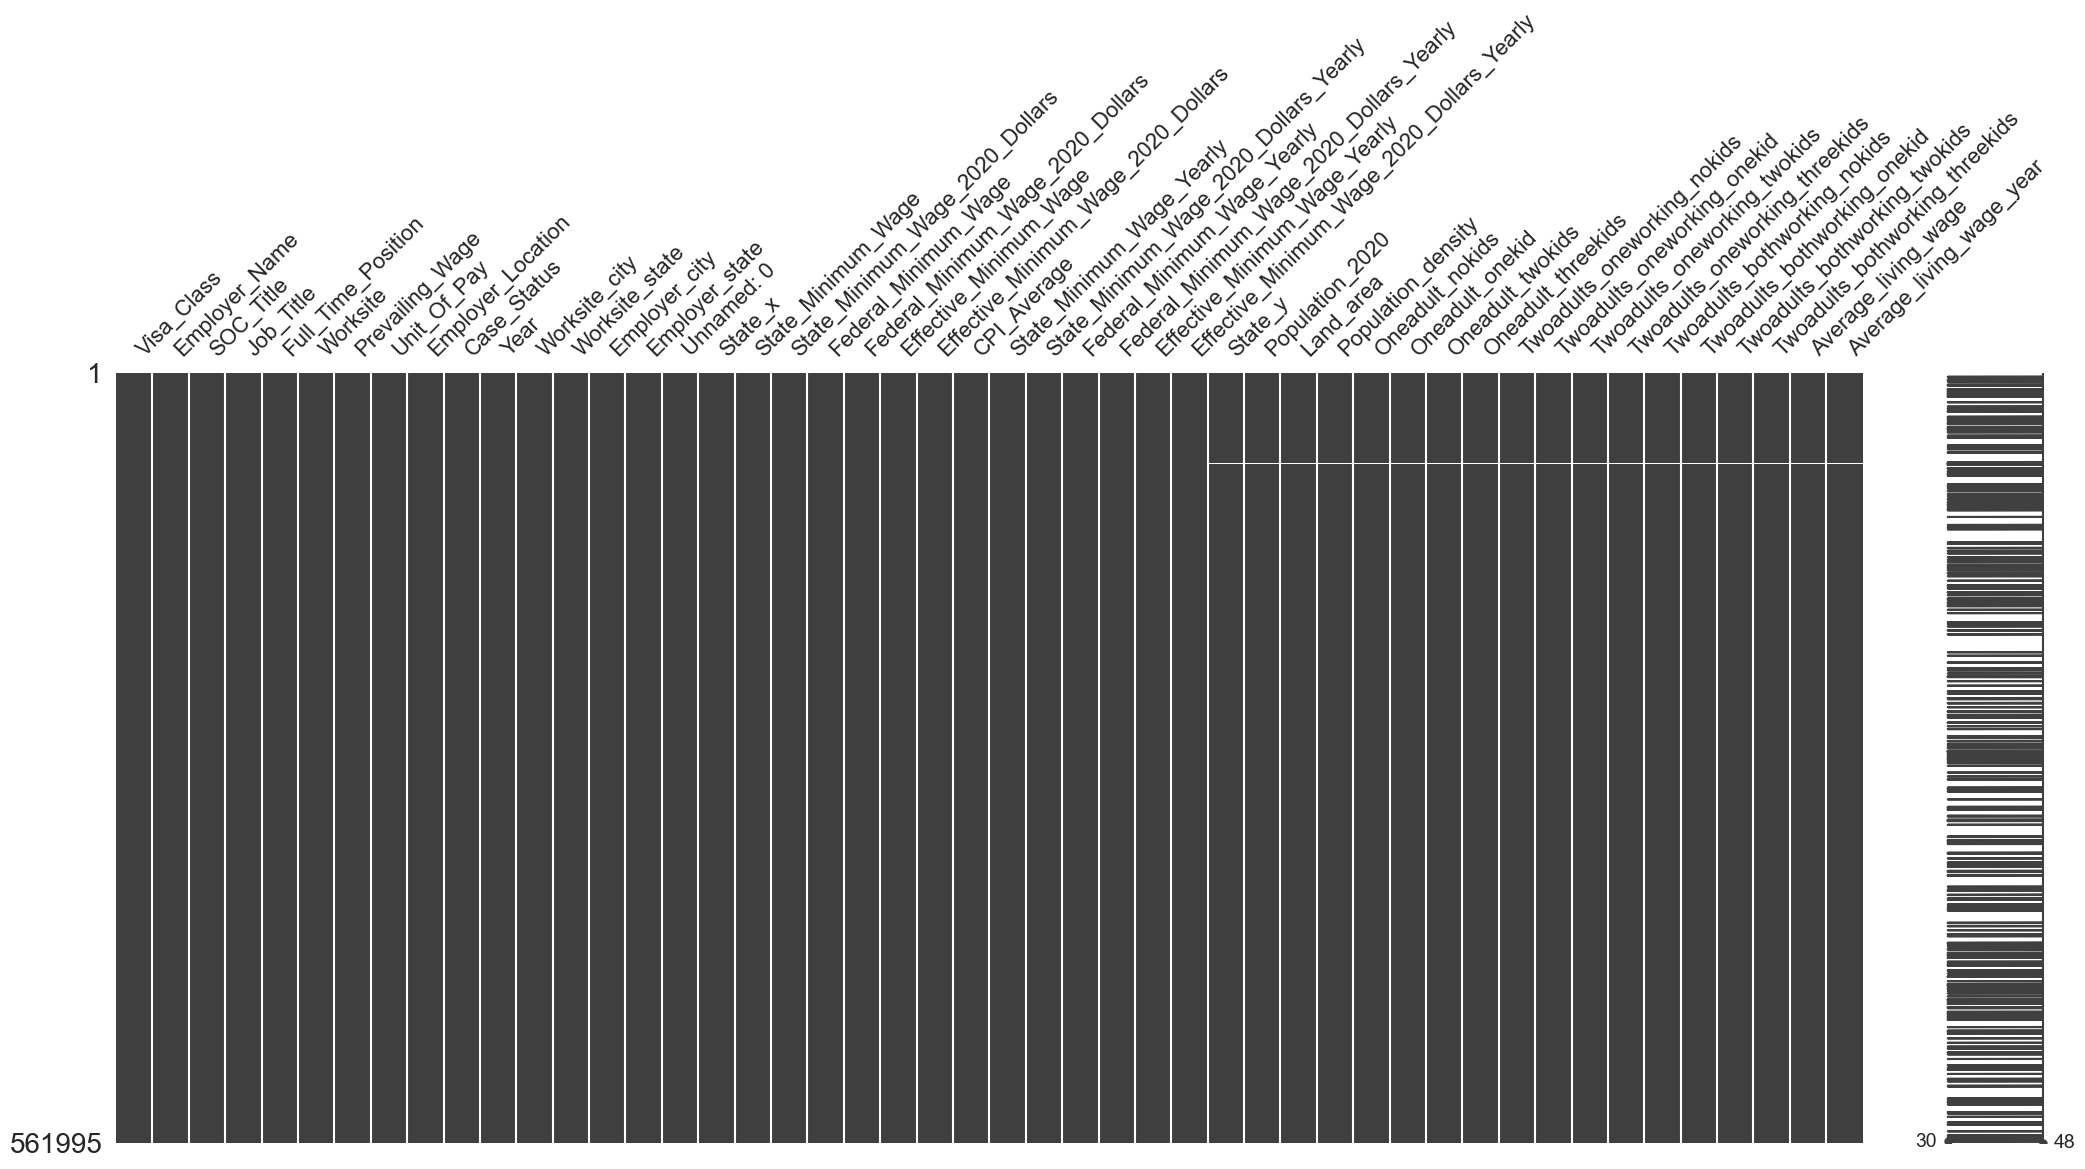

In [59]:
msno.matrix(merge_min_wage_H1B_living_wage)

In [60]:
H1B_USA['Prevailing_Wage'].isna().value_counts()

Prevailing_Wage
False    2340616
True        1925
Name: count, dtype: int64

In [61]:
merge_min_wage_H1B_living_wage.dropna(inplace=True)

<Axes: >

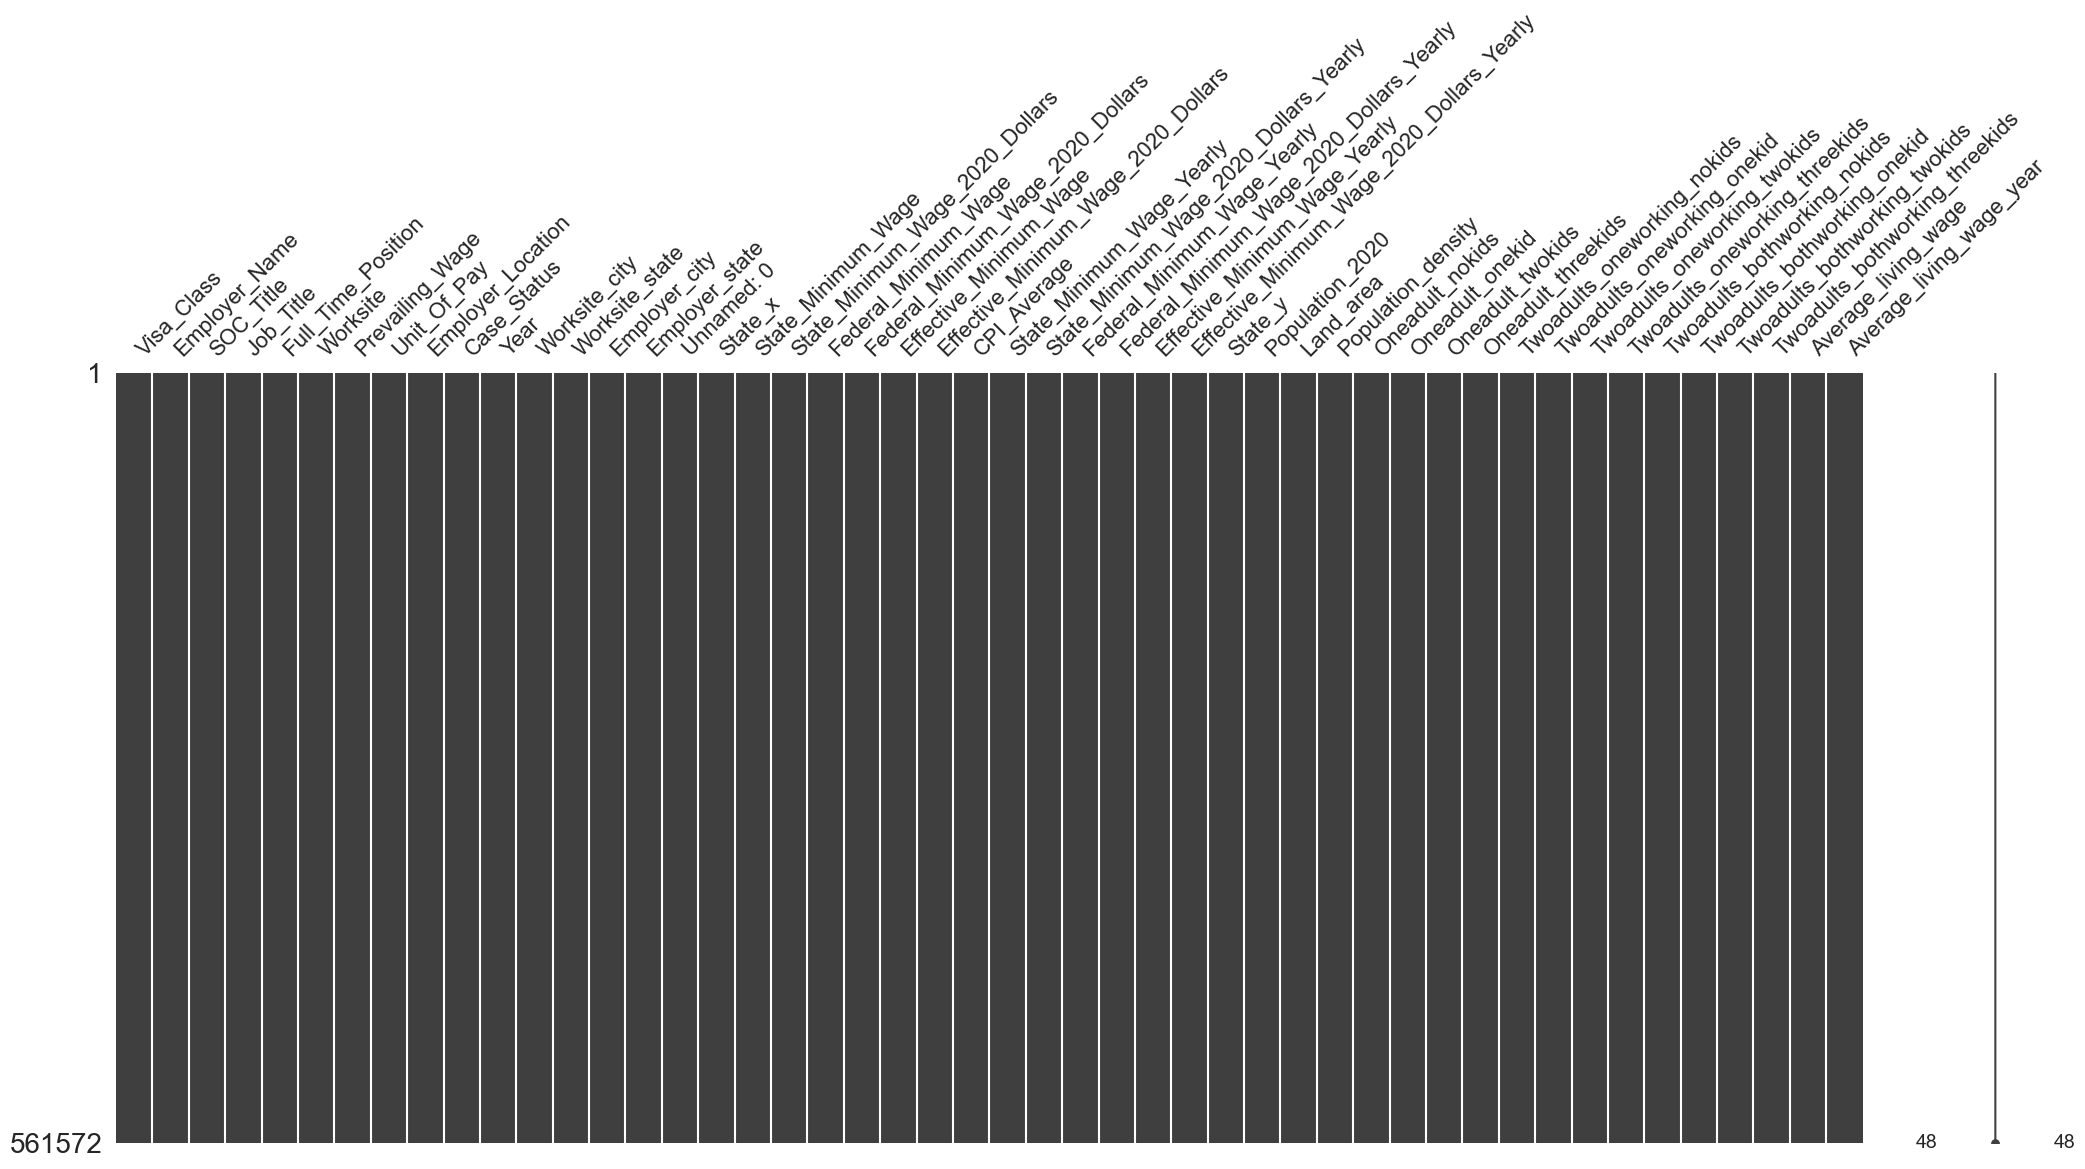

In [62]:
msno.matrix(merge_min_wage_H1B_living_wage)

Draw  plot for the number of H1B visa per year and average minimum living wage of that year(Include the 2019 nan values)

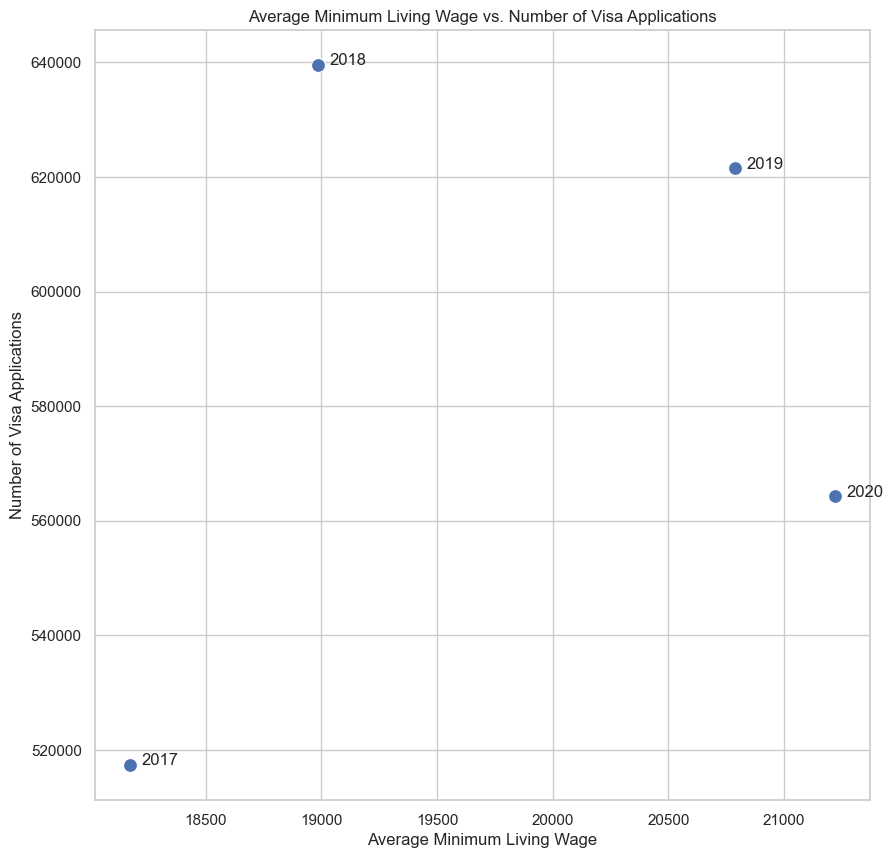

In [63]:
# Draw  plot for Visa num of every year and the number of average living wage(Include the 2019)

years = [2017, 2018, 2019, 2020]
year_counts_each = merge_min_wage_H1B_first['Year'].value_counts()
year_counts_df = pd.DataFrame({'Year': year_counts_each.index, 'Count': year_counts_each.values})

for year in years:
    average_min_living_wage = merge_min_wage_H1B_first[merge_min_wage_H1B_first['Year'] == year]['Effective_Minimum_Wage_Yearly'].mean()
    
    year_counts_df.loc[year_counts_df['Year'] == year, 'average_min_living_wage'] = average_min_living_wage

year_counts_df

plt.figure(figsize=(10, 10))
sns.scatterplot(x='average_min_living_wage', y='Count', data=year_counts_df, s=100)

for i in range(year_counts_df.shape[0]):
    plt.text(x=year_counts_df.average_min_living_wage[i] + 50, y=year_counts_df.Count[i], s=year_counts_df.Year[i])

plt.title('Average Minimum Living Wage vs. Number of Visa Applications')
plt.xlabel('Average Minimum Living Wage')
plt.ylabel('Number of Visa Applications')
plt.show()


In [64]:
merge_min_wage_H1B_living_wage.columns

Index(['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 'Unit_Of_Pay',
       'Employer_Location', 'Case_Status', 'Year', 'Worksite_city',
       'Worksite_state', 'Employer_city', 'Employer_state', 'Unnamed: 0',
       'State_x', 'State_Minimum_Wage', 'State_Minimum_Wage_2020_Dollars',
       'Federal_Minimum_Wage', 'Federal_Minimum_Wage_2020_Dollars',
       'Effective_Minimum_Wage', 'Effective_Minimum_Wage_2020_Dollars',
       'CPI_Average', 'State_Minimum_Wage_Yearly',
       'State_Minimum_Wage_2020_Dollars_Yearly', 'Federal_Minimum_Wage_Yearly',
       'Federal_Minimum_Wage_2020_Dollars_Yearly',
       'Effective_Minimum_Wage_Yearly',
       'Effective_Minimum_Wage_2020_Dollars_Yearly', 'State_y',
       'Population_2020', 'Land_area', 'Population_density', 'Oneadult_nokids',
       'Oneadult_onekid', 'Oneadult_twokids', 'Oneadult_threekids',
       'Twoadults_oneworking_nokids', 'Twoadults_oneworking_onekid',
 

Draw plot about seeing the relationship between Average living wage and Effective_Minimum_Wage

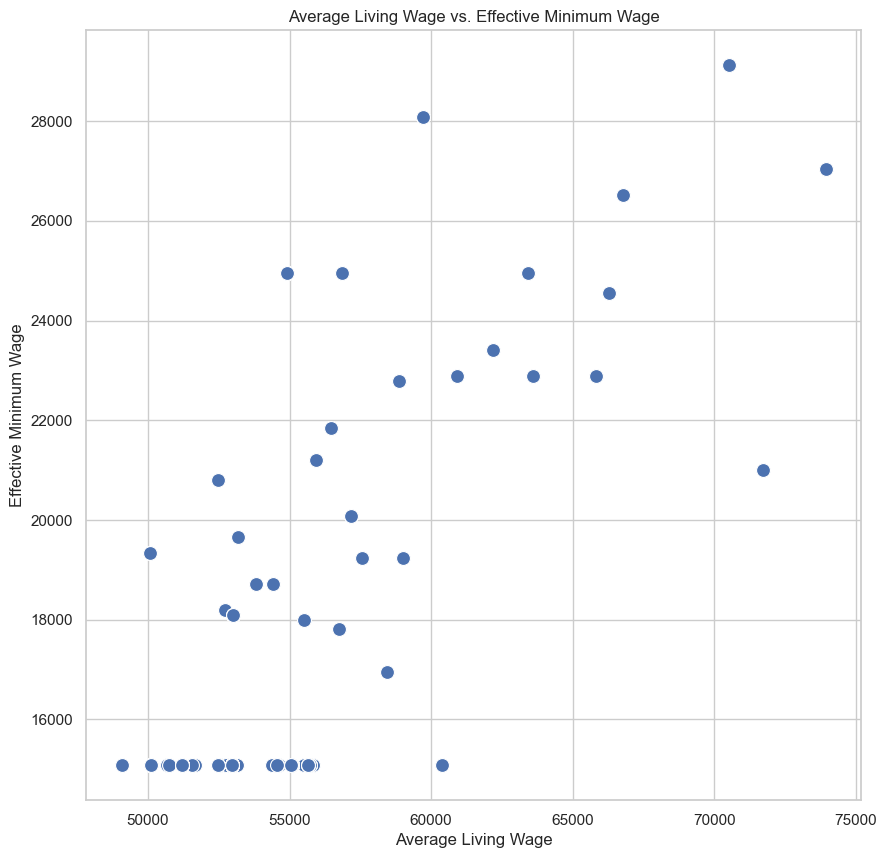

In [65]:
merge_min_wage_H1B_living_wage
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Average_living_wage_year', y='Effective_Minimum_Wage_Yearly', data=merge_min_wage_H1B_living_wage, s=100)
plt.title('Average Living Wage vs. Effective Minimum Wage')
plt.xlabel('Average Living Wage')
plt.ylabel('Effective Minimum Wage')
plt.show()

In [66]:
# Calculate the correlation between the average living wage and the effective minimum wage
merge_min_wage_H1B_living_wage[['Average_living_wage_year', 'Effective_Minimum_Wage_Yearly']].corr()


,Average_living_wage_year,Effective_Minimum_Wage_Yearly
Average_living_wage_year,1.000000,0.833946
Effective_Minimum_Wage_Yearly,0.833946,1.000000


The correlation between Average_living_wage_year and Effective_Minimum_Wage_Yearly is 0.833946
which means those two variable are related to each other.